In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 ## A) Importing library and dataset

In [1]:
# load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

In [2]:
!pip install patool
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/Inventory_P47/prorevenue.rar", outdir="/content")

patool: Extracting /content/drive/MyDrive/Inventory_P47/prorevenue.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/Inventory_P47/prorevenue.rar
patool:     with cwd='/content'


PatoolError: ignored

In [6]:
# load product data
product_data = pd.read_csv("./productdetails.csv")
product_data.drop('Unnamed: 0',axis=1, inplace=True)

# rename the column names with same naming conventions
product_data.rename({'product type': 'product_type', 'cost per unit': 'cost_per_unit', 
                    'Time for delivery': 'time_delivery'}, axis = 'columns',  inplace = True)
product_data.head()

,product_type,cost_per_unit,time_delivery
0,1,457,11
1,2,1545,13
2,3,1910,14
3,4,131,9
4,5,868,8


In [7]:
# load revenue data
revenue_data = pd.read_csv("./prorevenue.csv", low_memory=False)

# rename the column names with same naming conventions
revenue_data.rename({'Product type': 'product_type', 'Revenue': 'revenue', 'No of purchases': 'number_purchases', 
                    'store status': 'store_status', 'Promotion applied': 'promotion_apply', 'Generic Holiday':
                    'generic_holiday', 'Education Holiday': 'education_holiday', 'DayOfWeek': 'day_of_week'}, 
                    axis = 'columns',  inplace = True)
revenue_data.head()

,product_type,revenue,number_purchases,store_status,promotion_apply,generic_holiday,education_holiday,day_of_week
0,1,14190,890,open,1,0,1,5
1,2,6064,789,open,1,0,1,5
2,3,14190,821,open,1,0,1,5
3,4,13995,456,open,1,0,1,5
4,5,4822,559,open,1,0,1,5


## B) EDA I - Dataset information

In [8]:
# datatypes of the features
print('Product dataset features :\n', product_data.dtypes)
print('\n')
print('Revenue dataset features :\n', revenue_data.dtypes)

Product dataset features :
 product_type     int64
cost_per_unit    int64
time_delivery    int64
dtype: object


Revenue dataset features :
 product_type          int64
revenue               int64
number_purchases      int64
store_status         object
promotion_apply       int64
generic_holiday      object
education_holiday     int64
day_of_week           int64
dtype: object


In [ ]:
# feature basic information
print(product_data.info())
print('\n')
print(revenue_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   product_type   1115 non-null   int64
 1   cost_per_unit  1115 non-null   int64
 2   time_delivery  1115 non-null   int64
dtypes: int64(3)
memory usage: 26.3 KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   product_type       1017209 non-null  int64 
 1   revenue            1017209 non-null  int64 
 2   number_purchases   1017209 non-null  int64 
 3   store_status       1017209 non-null  object
 4   promotion_apply    1017209 non-null  int64 
 5   generic_holiday    1017209 non-null  object
 6   education_holiday  1017209 non-null  int64 
 7   day_of_week        1017209 non-null  int64 
dtypes: int64(6), object(2)
memory u

- Product dataset, all the features are of numeric type (int64) __[product_type + cost_per_unit + time_delivery]__
- Revenue dataset, two features are of categorical type (object) __[store_status + generic_holiday]__ and six features are of numeric type(int64) __[product_type + revenue + number_purchases + promotin_apply + education_holiday + day_of_week]__

In [10]:
# merge two datasets based on constrain 'product_type'
data = pd.merge(product_data, revenue_data, on='product_type')
data.head()

,product_type,cost_per_unit,time_delivery,revenue,number_purchases,store_status,promotion_apply,generic_holiday,education_holiday,day_of_week
0,1,457,11,14190,890,open,1,0,1,5
1,1,457,11,5020,546,open,1,0,1,4
2,1,457,11,4782,523,open,1,0,1,3
3,1,457,11,5011,560,open,1,0,1,2
4,1,457,11,6102,612,open,1,0,1,1


In [ ]:
# export merged data
data.to_csv('drive/MyDrive/ExcelR_Project/Project_2/data_merged.csv')

In [ ]:
# data dimenssions
print('Product data dimenssion :', product_data.shape)
print('Revenue data dimenssion :', revenue_data.shape)
print('Merged data dimenssion  :', data.shape)
print('\n')

# missing values (Nan)
print('Missing entry in product data :', product_data.isnull().sum().sum())
print('Missing entry in revenue data :', revenue_data.isnull().sum().sum())
print('Missing entry in merged data  :', data.isnull().sum().sum())

# Ckeck for data duplications
data_duplicate = data.duplicated()
print('\nTotal dplication in data :', data_duplicate.sum())

Product data dimenssion : (1115, 3)
Revenue data dimenssion : (1017209, 8)
Merged data dimenssion  : (1017209, 10)


Missing entry in product data : 0
Missing entry in revenue data : 0
Missing entry in merged data  : 0

Total dplication in data : 154077


In [ ]:
# To get the count of unique values and the list with number of unique values

# Define categorical and numerical attributes
categorical_col = data.select_dtypes(include = ['object'])
numerical_col = data.select_dtypes(include = ['int64'])

# List to store names of all categorical and numerical features seperately
categorical_col_name = []
numerical_col_name = []

cnt_a = 0 
cnt_b = 0

print('<======= Categorical features with total unique categories =======>\n')
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()):
        categorical_col_name.append(column)
        cnt_a += 1
        print(f"{cnt_a}) {column} : {data[column].nunique()}")
        print("------------------------------------")
        print(f"{data[column].value_counts()}")
        print("====================================\n\n")

print('\n<======= Numerical features with total unique occurances =======>\n')
for column in data.columns:
    if (data[column].dtype == 'int64' or data[column].dtype == 'float64') and len(data[column].unique()):
        numerical_col_name.append(column)
        cnt_b += 1
        print(f"{cnt_b}) {column} : {data[column].nunique()}")
        print("------------------------------------")
        print(f"{data[column].value_counts()}")
        print("====================================\n\n")

<======= Categorical features with total unique categories =======>

1) store_status : 2
------------------------------------
open     844390
close    172819
Name: store_status, dtype: int64


2) generic_holiday : 4
------------------------------------
0    986159
a     20260
b      6690
c      4100
Name: generic_holiday, dtype: int64



<======= Numerical features with total unique occurances =======>

1) product_type : 1115
------------------------------------
1023    942
666     942
675     942
163     942
674     942
       ... 
900     758
902     758
903     758
904     758
512     758
Name: product_type, Length: 1115, dtype: int64


2) cost_per_unit : 863
------------------------------------
1952    3768
1058    3768
284     3768
203     3768
131     3768
        ... 
1107     758
933      758
813      758
190      758
1023     758
Name: cost_per_unit, Length: 863, dtype: int64


3) time_delivery : 10
------------------------------------
11    114437
10    108786
13    108050
6 

- generic holiday has 4 different unique values, basically a, b, c are the part of 1 if we consider generic holiday as about 2 quniue values either 0 or 1. 

      generic_holiday : 4
      0    986159
      a     20260
      b      6690
      c      4100
      Name: generic_holiday, dtype: int64

In [ ]:
# descriptive statistics of numeric variables
pd.set_option("display.float_format", "{:.2f}".format)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
product_type,1017209.00,558.43,321.91,1.00,280.00,558.00,838.00,1115.00
cost_per_unit,1017209.00,1012.84,565.50,50.00,502.00,1023.00,1519.00,1999.00
time_delivery,1017209.00,9.54,2.86,5.00,7.00,10.00,12.00,14.00
revenue,1017209.00,5773.83,3849.95,0.00,3727.00,5744.00,7856.00,41551.00
number_purchases,1017209.00,633.14,464.41,0.00,405.00,609.00,837.00,7388.00
promotion_apply,1017209.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
education_holiday,1017209.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
day_of_week,1017209.00,4.00,2.00,1.00,2.00,4.00,6.00,7.00


In [ ]:
# # correlation for product dataset
# cm = sns.light_palette("green", as_cmap=True)

# product_corr = product_data.corr()
# product_corr = product_corr.style.background_gradient(cmap=cm)
# product_corr

In [ ]:
# # correlation for revenue dataset
# cm = sns.light_palette("green", as_cmap=True)

# revenue_corr = revenue_data.corr()
# revenue_corr = revenue_corr.style.background_gradient(cmap=cm)
# revenue_corr

In [10]:
# finding the correlation of numeric features
corr_data = data.corr()
corr_data

,product_type,cost_per_unit,time_delivery,revenue,number_purchases,promotion_apply,education_holiday,day_of_week
product_type,1.000000,-0.042775,-0.018510,0.005119,0.024331,0.000058,0.000641,-0.000008
cost_per_unit,-0.042775,1.000000,0.020338,0.003452,0.000673,0.000008,0.001415,-0.000001
time_delivery,-0.018510,0.020338,1.000000,-0.008501,0.003093,0.000016,-0.000055,-0.000002
revenue,0.005119,0.003452,-0.008501,1.000000,0.894702,0.452346,0.085136,-0.462120
number_purchases,0.024331,0.000673,0.003093,0.894702,1.000000,0.316165,0.071564,-0.386447
promotion_apply,0.000058,0.000008,0.000016,0.452346,0.316165,1.000000,0.067483,-0.392925
education_holiday,0.000641,0.001415,-0.000055,0.085136,0.071564,0.067483,1.000000,-0.205388
day_of_week,-0.000008,-0.000001,-0.000002,-0.462120,-0.386447,-0.392925,-0.205388,1.000000


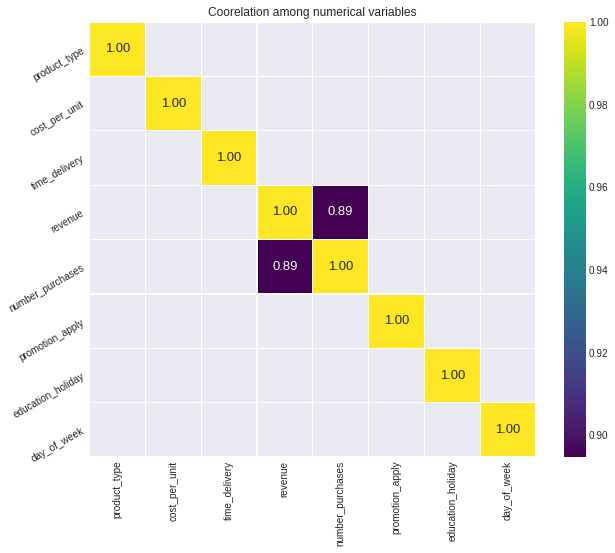

In [11]:
# feature to feature relationship
plt.figure(figsize=(10, 8))
plt.title('Coorelation among numerical variables')
ax = sns.heatmap(corr_data[(corr_data >= 0.5) | (corr_data <= -0.5)], fmt = '.2f', cmap='viridis', annot = True,
                 linewidths = 0.2, annot_kws={"size": 13})
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 30)
plt.show()

- Number_purchases is highlty dependent on revenue about __89%__. 
- No others strong +ve or -ve linearship is found except revenue v/s nmber_purchases

In [12]:
# Standard deviation of the numeric features
std_data = data.std()
std_data

product_type          321.908651
cost_per_unit         565.501611
time_delivery           2.857043
revenue              3849.953591
number_purchases      464.411545
promotion_apply         0.485759
education_holiday       0.383056
day_of_week             1.997391
dtype: float64

## C) Data preprocessing

In [9]:
# replacing the a, b, c from generic_holiday with 1
print('Before preprocessing :\n', data.generic_holiday.value_counts())
data['generic_holiday'] = data['generic_holiday'].replace({'a':1, 'b':1, 'c':1})
print('\nAfter preprocessing  :\n', data.generic_holiday.value_counts())

NameError: ignored

In [14]:
data.generic_holiday = data.generic_holiday.astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   product_type       1017209 non-null  int64 
 1   cost_per_unit      1017209 non-null  int64 
 2   time_delivery      1017209 non-null  int64 
 3   revenue            1017209 non-null  int64 
 4   number_purchases   1017209 non-null  int64 
 5   store_status       1017209 non-null  object
 6   promotion_apply    1017209 non-null  int64 
 7   generic_holiday    1017209 non-null  int64 
 8   education_holiday  1017209 non-null  int64 
 9   day_of_week        1017209 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 85.4+ MB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   product_type       1017209 non-null  int64 
 1   cost_per_unit      1017209 non-null  int64 
 2   time_delivery      1017209 non-null  int64 
 3   revenue            1017209 non-null  int64 
 4   number_purchases   1017209 non-null  int64 
 5   store_status       1017209 non-null  object
 6   promotion_apply    1017209 non-null  int64 
 7   generic_holiday    1017209 non-null  int64 
 8   education_holiday  1017209 non-null  int64 
 9   day_of_week        1017209 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 85.4+ MB


## D) EDA II - Univariate and bivariate analysis

### 1) Univariate analysis - Cateorical features

In [ ]:
# store status
store_status_counts = categorical_col.store_status.value_counts()
store_status_counts_per = categorical_col["store_status"].value_counts(normalize = True) * 100
print('Total counts :\n{} \n\nTotal % counts :\n{}'.format(store_status_counts, store_status_counts_per))

Total counts :
open     844390
close    172819
Name: store_status, dtype: int64 

Total % counts :
open    83.01
close   16.99
Name: store_status, dtype: float64


Text(0.5, 1.0, 'Counts for store status')

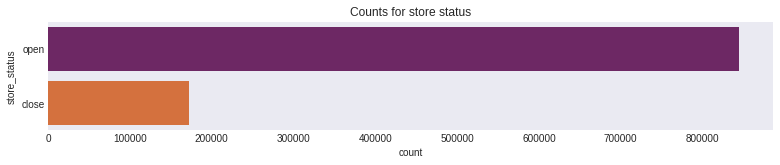

In [ ]:
plt.subplots(figsize=(13, 2)) 
sns.countplot(y = categorical_col["store_status"], palette = 'inferno')
plt.title('Counts for store status')

### 2) Univariate analysis - Numerical features

In [ ]:
# day of weeks
day_of_weeke_counts = numerical_col.day_of_week.value_counts()
day_of_week_counts_per = numerical_col["day_of_week"].value_counts(normalize = True) * 100
print('Total counts :\n{} \n\nTotal % counts :\n{}'.format(day_of_weeke_counts, day_of_week_counts_per))

Total counts :
5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: day_of_week, dtype: int64 

Total % counts :
5   14.34
4   14.34
3   14.32
2   14.32
7   14.23
6   14.23
1   14.23
Name: day_of_week, dtype: float64


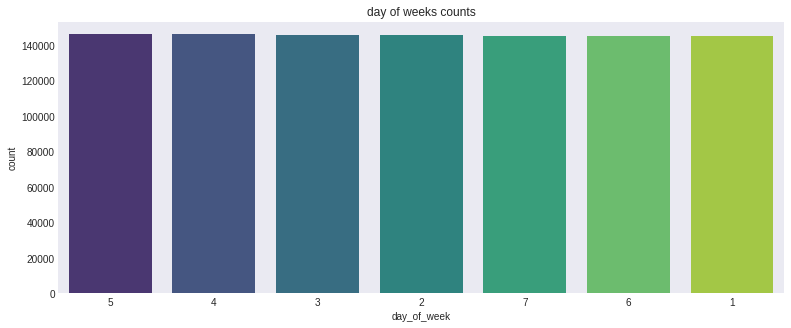

In [ ]:
# day of weeks
plt.subplots(figsize=(13, 5))
sns.countplot(x = numerical_col.day_of_week, palette = 'viridis', order = numerical_col['day_of_week'].value_counts().index)
plt.title('day of weeks counts')
plt.show()

In [ ]:
# time delivery
time_delivery_counts = numerical_col.time_delivery.value_counts()
time_delivery_counts_per = numerical_col["time_delivery"].value_counts(normalize = True) * 100
print('Total counts :\n{} \n\nTotal % counts :\n{}'.format(time_delivery_counts, time_delivery_counts_per))

Total counts :
11    114437
10    108786
13    108050
6     105408
8     104466
14     99734
5      99734
9      99572
12     91624
7      85398
Name: time_delivery, dtype: int64 

Total % counts :
11   11.25
10   10.69
13   10.62
6    10.36
8    10.27
14    9.80
5     9.80
9     9.79
12    9.01
7     8.40
Name: time_delivery, dtype: float64


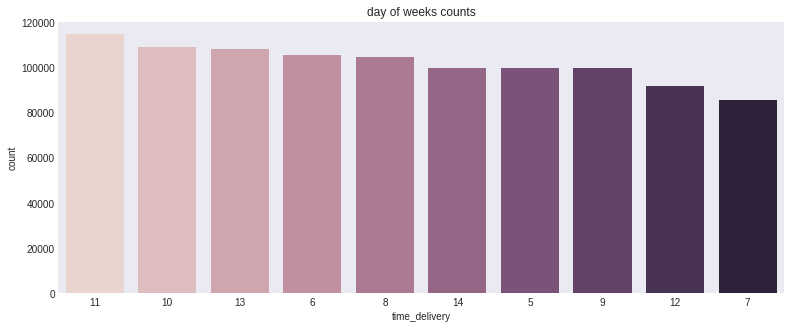

In [ ]:
# time delivery
plt.subplots(figsize=(13, 5))
sns.countplot(x = numerical_col.time_delivery, palette = "ch:s=.0", order = numerical_col['time_delivery'].value_counts().index)
plt.title('day of weeks counts')
plt.show()

3) Bivariate analysis

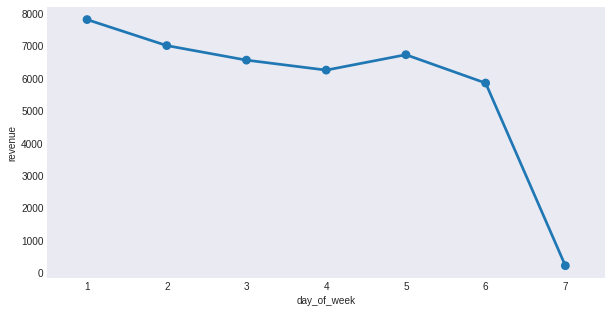

In [15]:
# revenue w.r.t. day_of_weeks
plt.figure(figsize =(10, 5))
sns.pointplot(x=data['day_of_week'], y=data['revenue'])

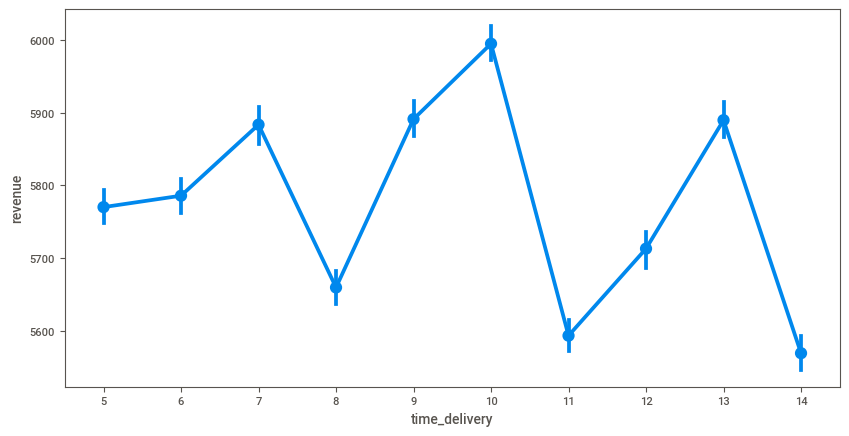

In [ ]:
# revenue w.r.t. day_of_weeks
plt.figure(figsize =(10, 5))
sns.pointplot(x=data['time_delivery'], y=data['revenue'])

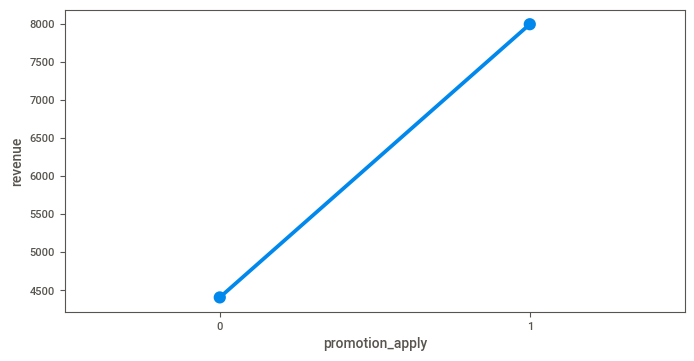

In [ ]:
# revenue w.r.t. day_of_weeks
plt.figure(figsize =(8, 4))
sns.pointplot(x=data['promotion_apply'], y=data['revenue'])

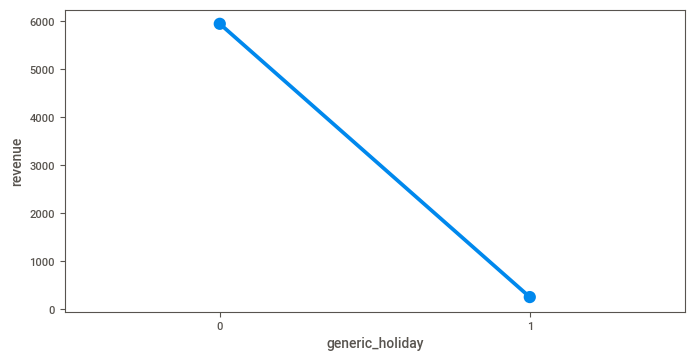

In [ ]:
# revenue w.r.t. day_of_weeks
plt.figure(figsize =(8, 4))
sns.pointplot(x=data['generic_holiday'], y=data['revenue'])

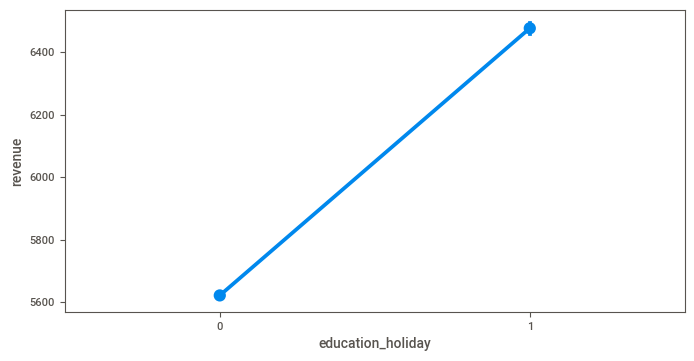

In [ ]:
# revenue w.r.t. day_of_weeks
plt.figure(figsize =(8, 4))
sns.pointplot(x=data['education_holiday'], y=data['revenue'])

In [17]:
!pip install sweetviz
import sweetviz as sv
advert_report = sv.analyze(data)

     |████████████████████████████████| 15.1MB 198kB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


                                             |          | [  0%]   00:00 -> (? left)


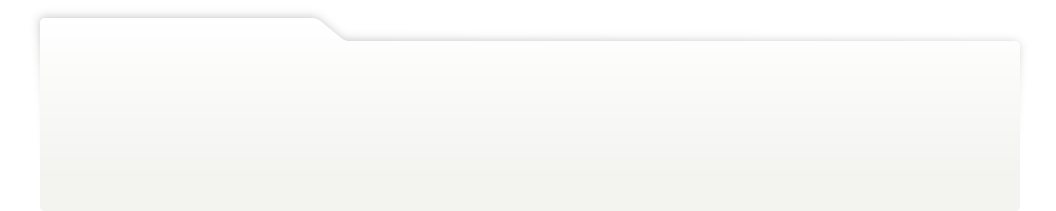
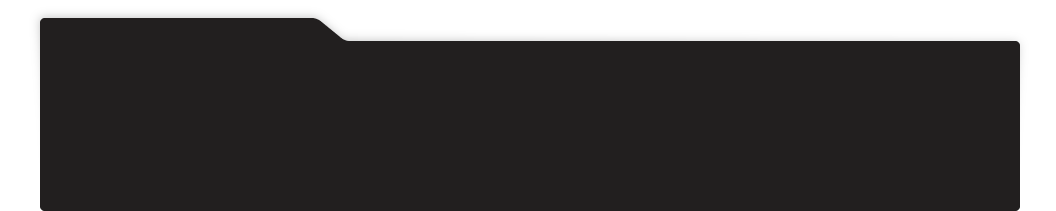
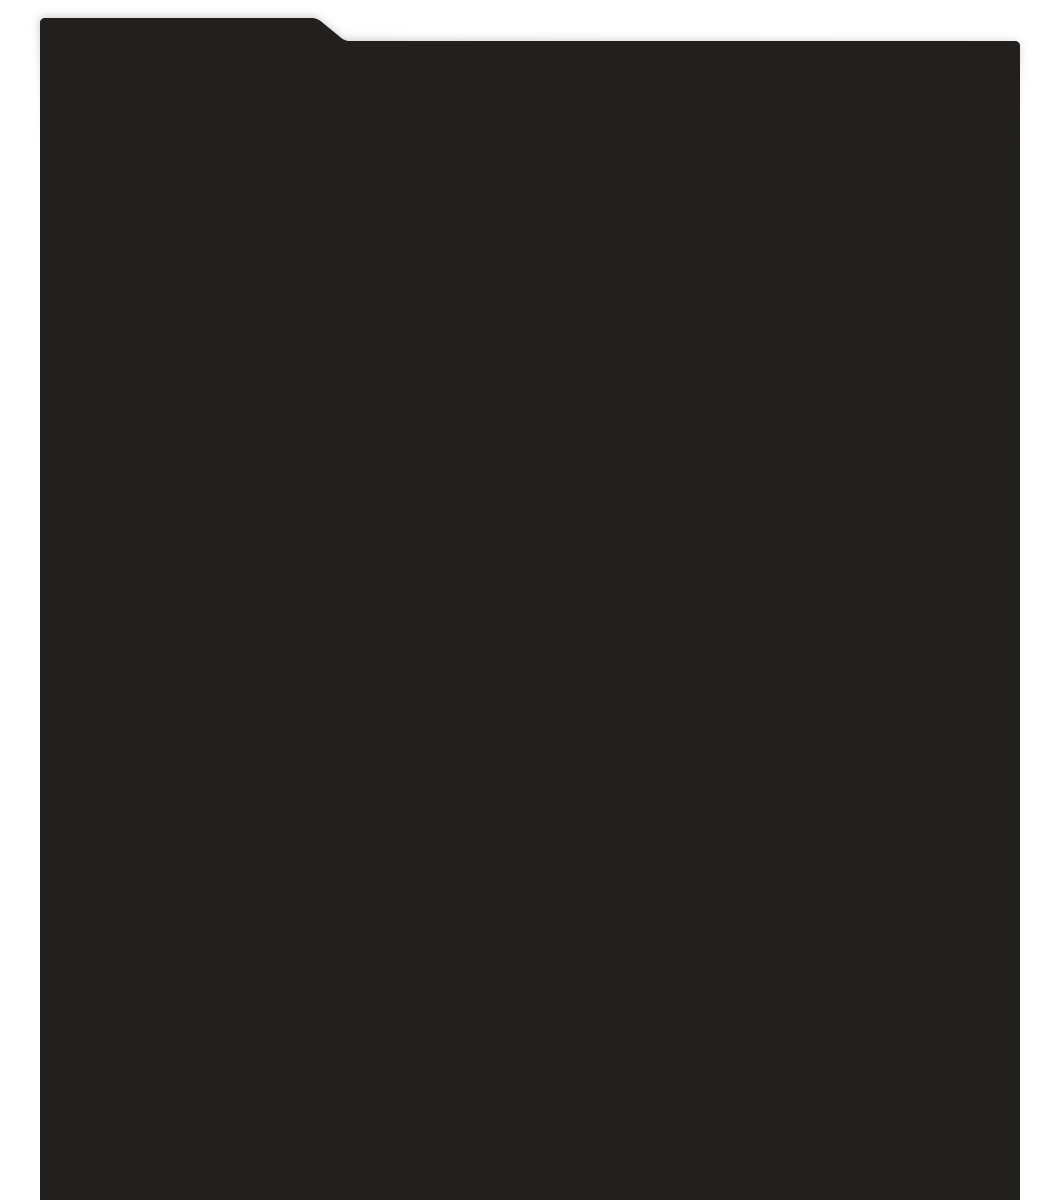
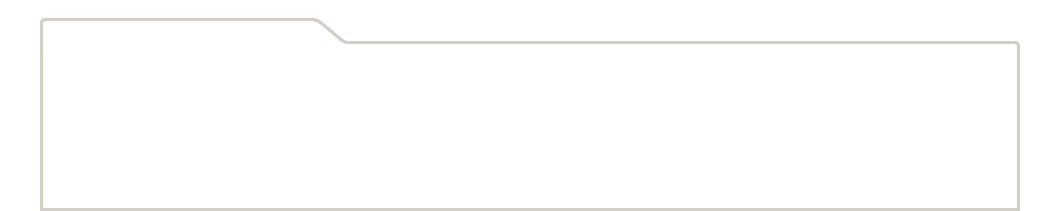
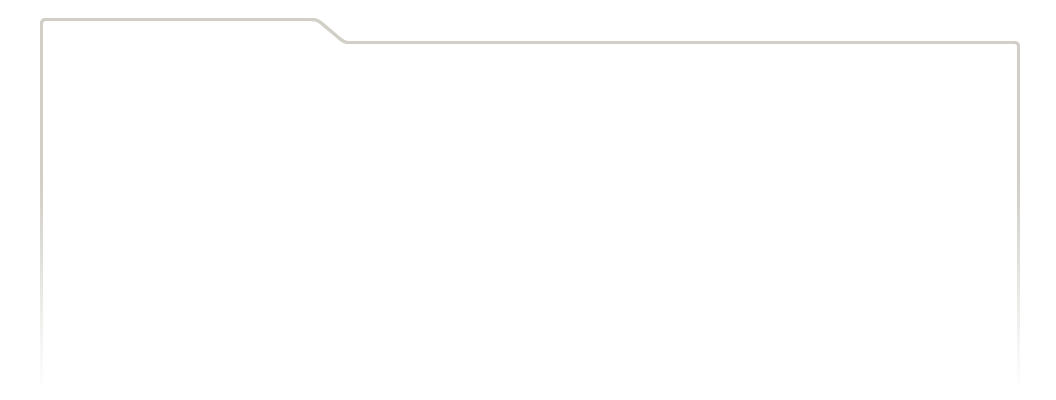
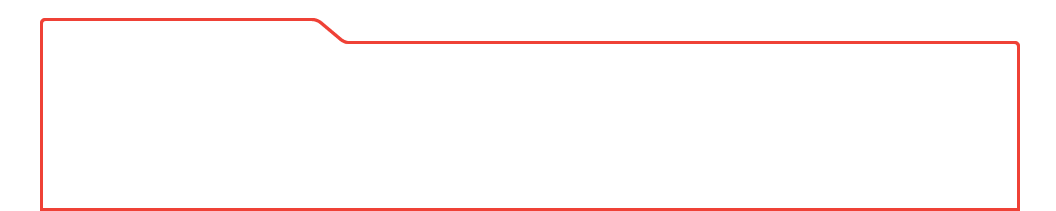
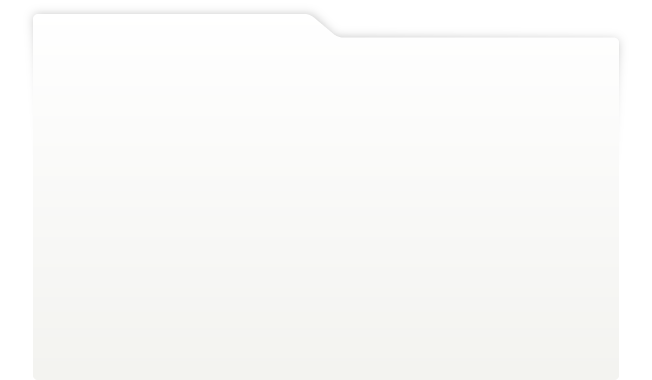
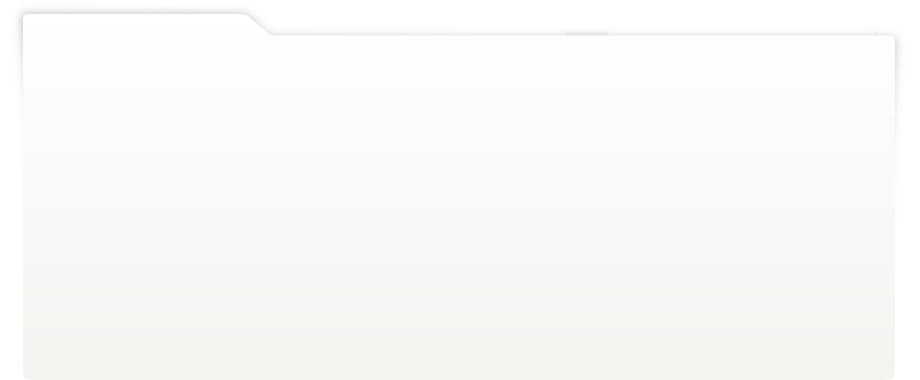
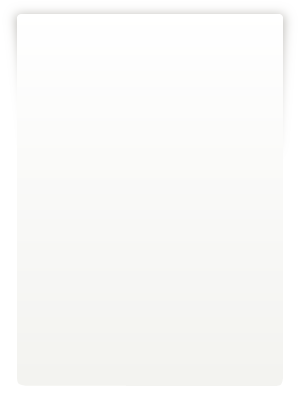
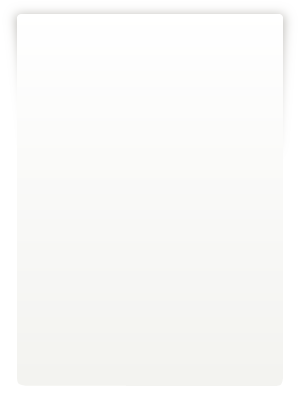
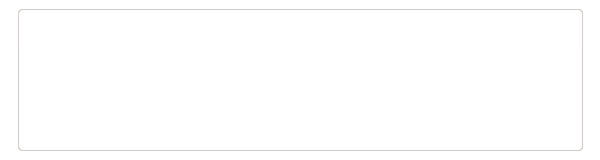
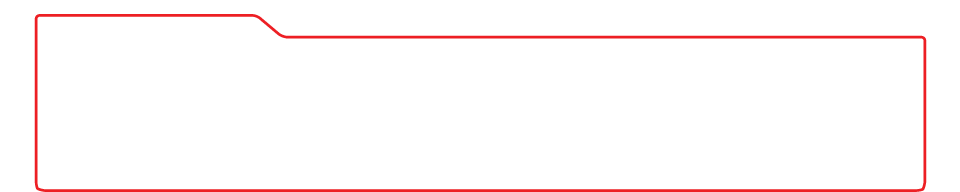
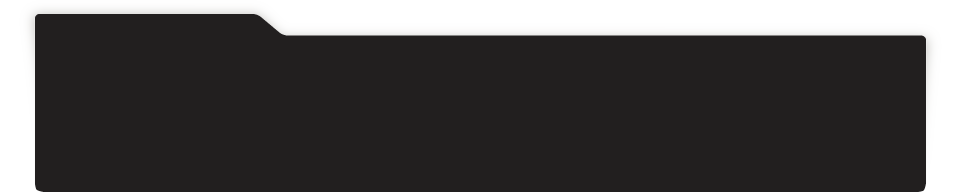
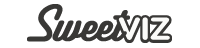
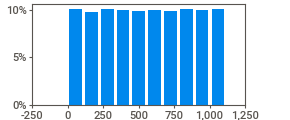
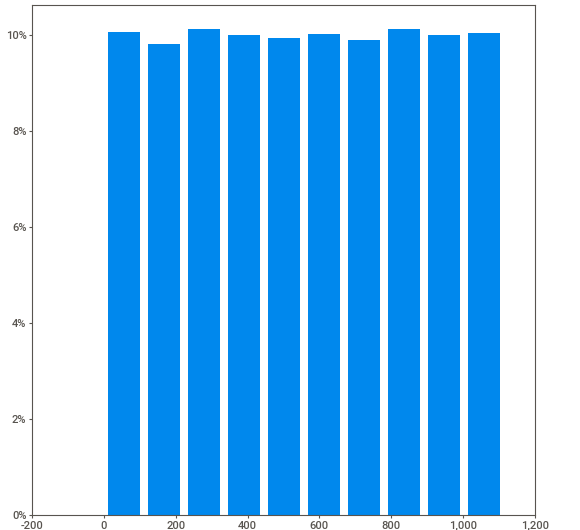
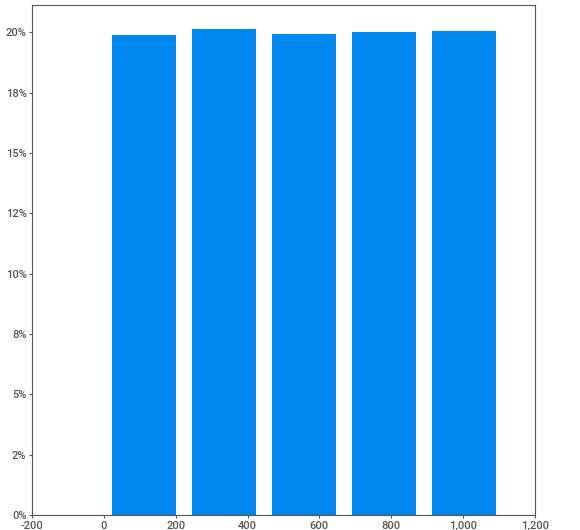
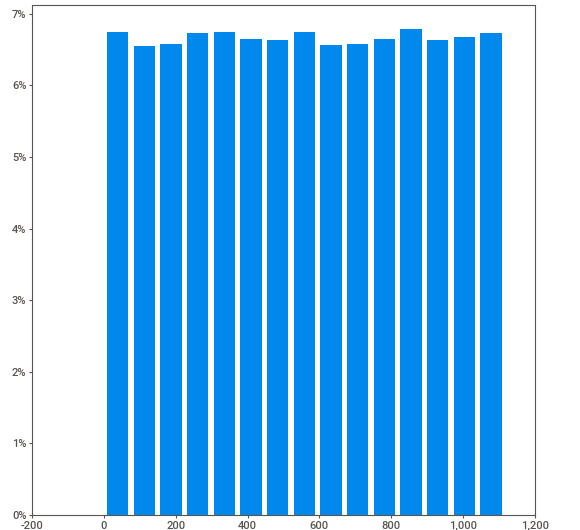
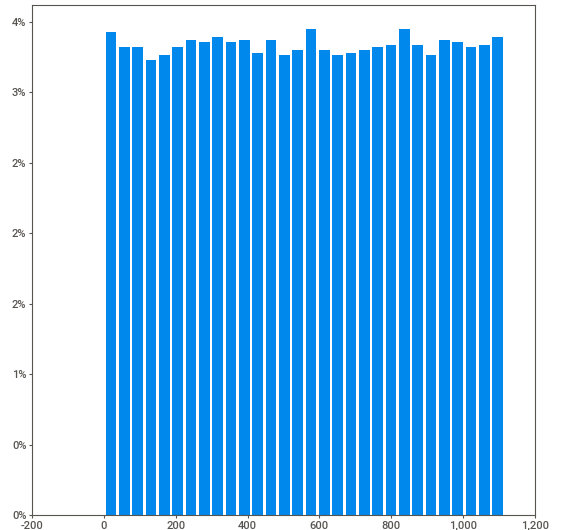
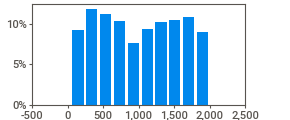
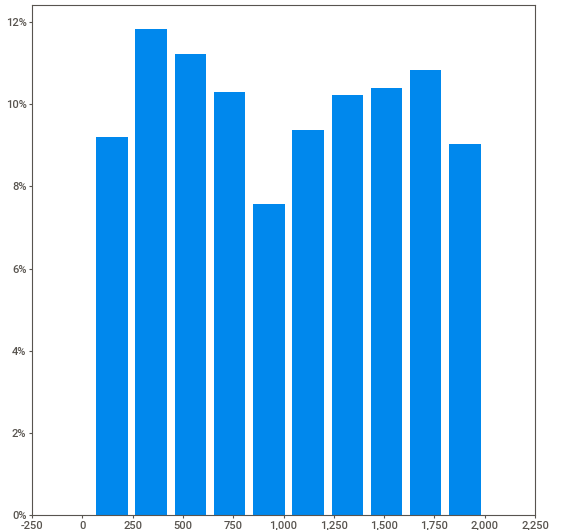
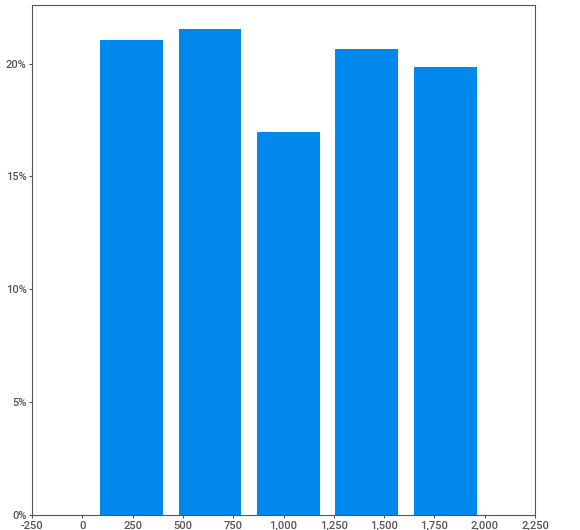
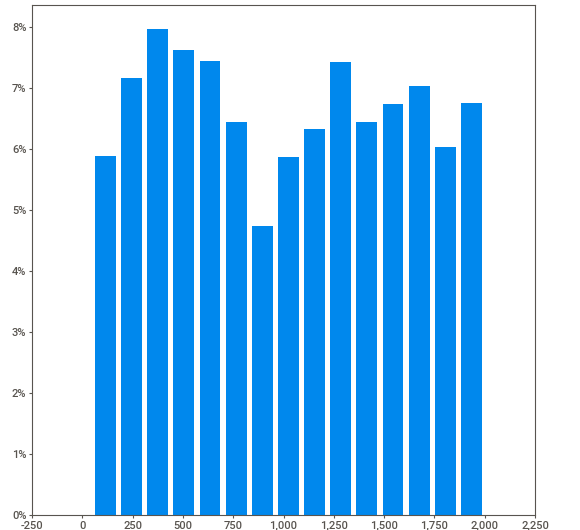
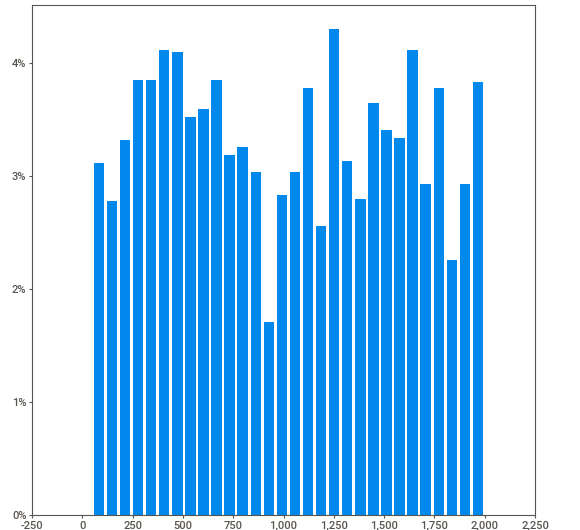
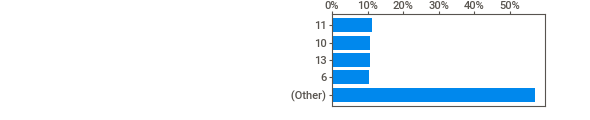
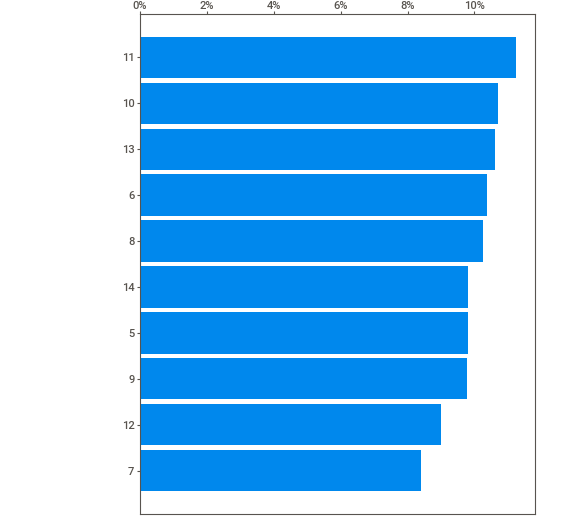
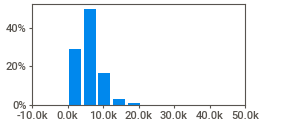
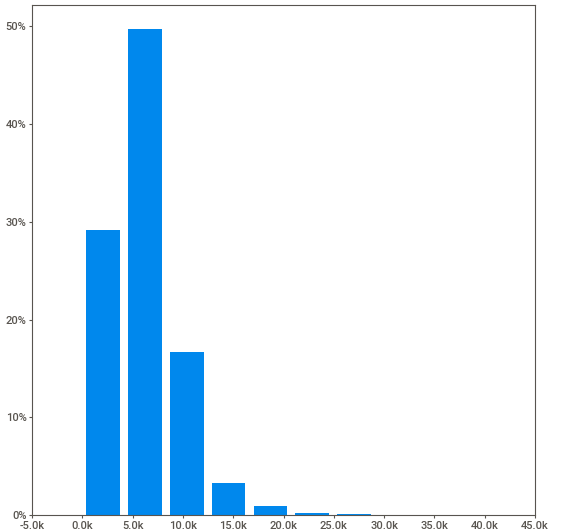
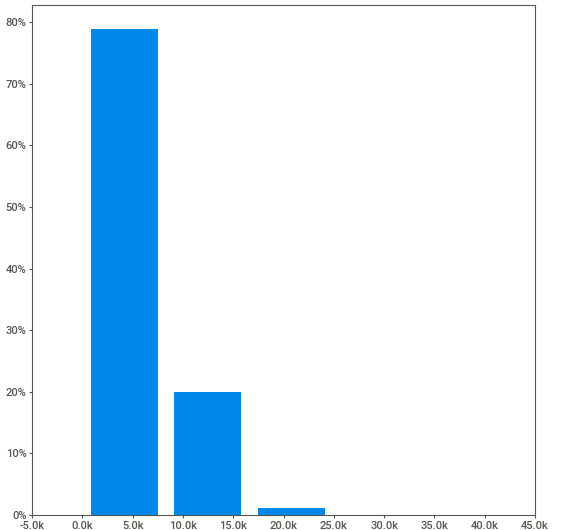
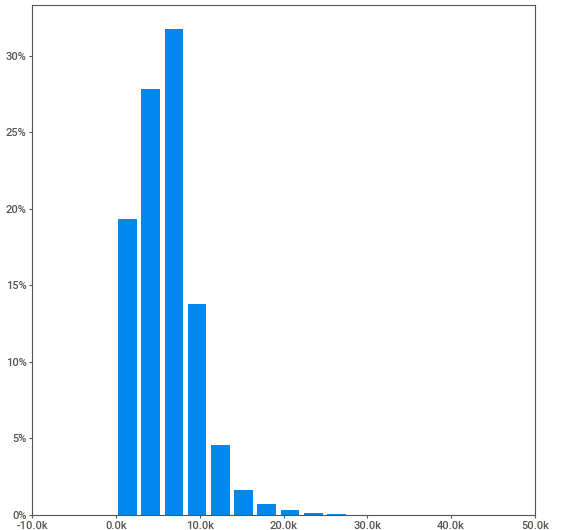
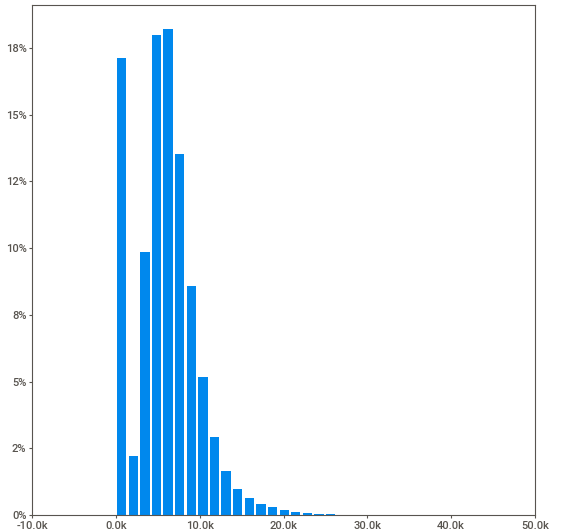
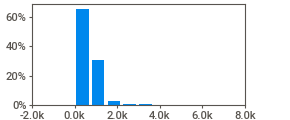
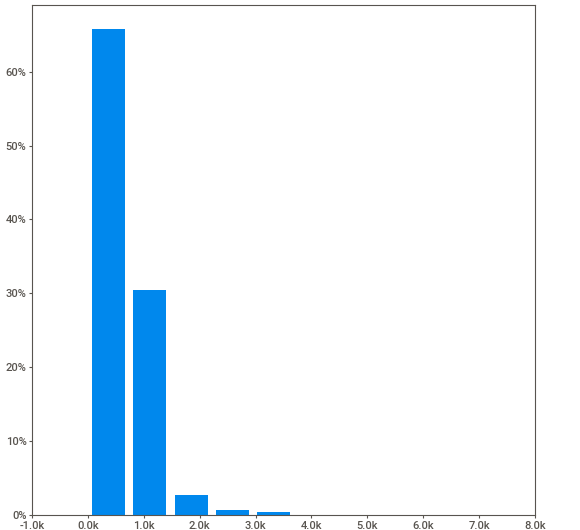
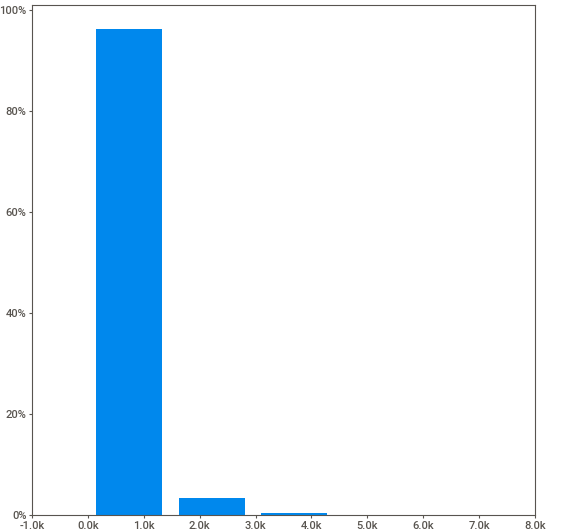
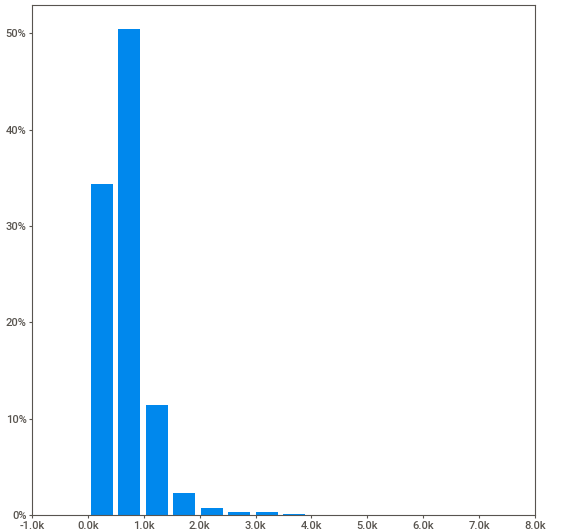
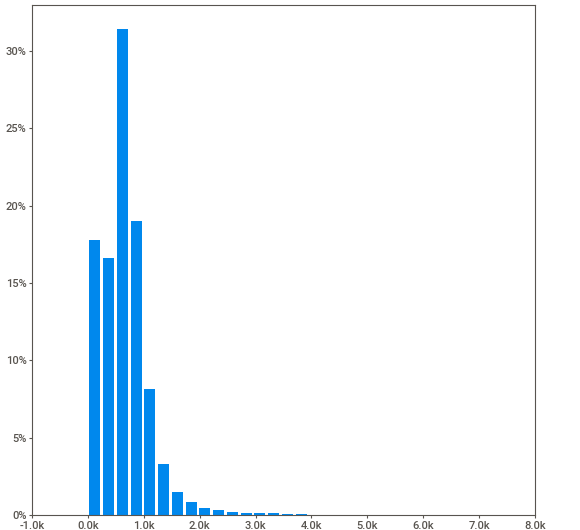
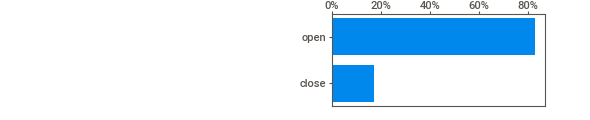
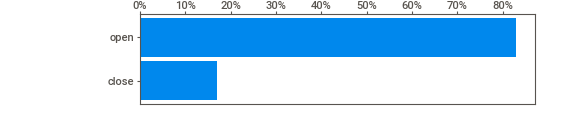
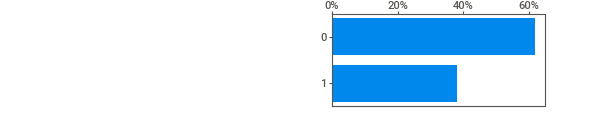
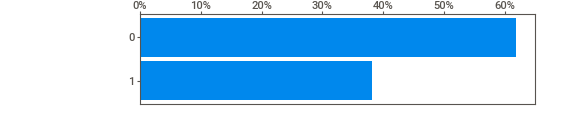
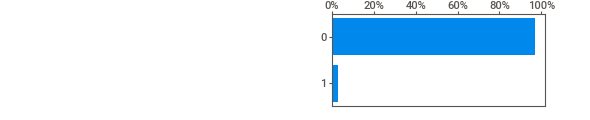
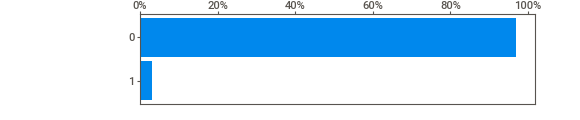
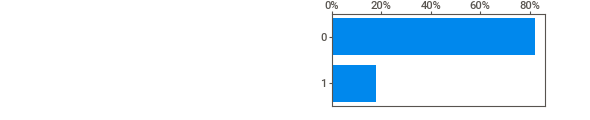
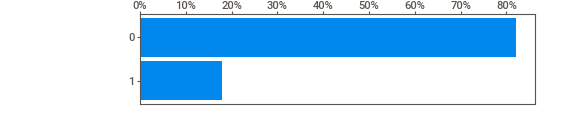
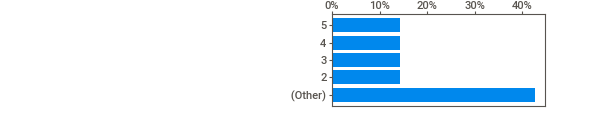
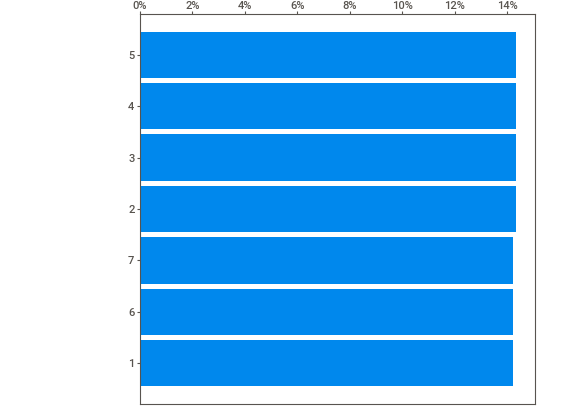
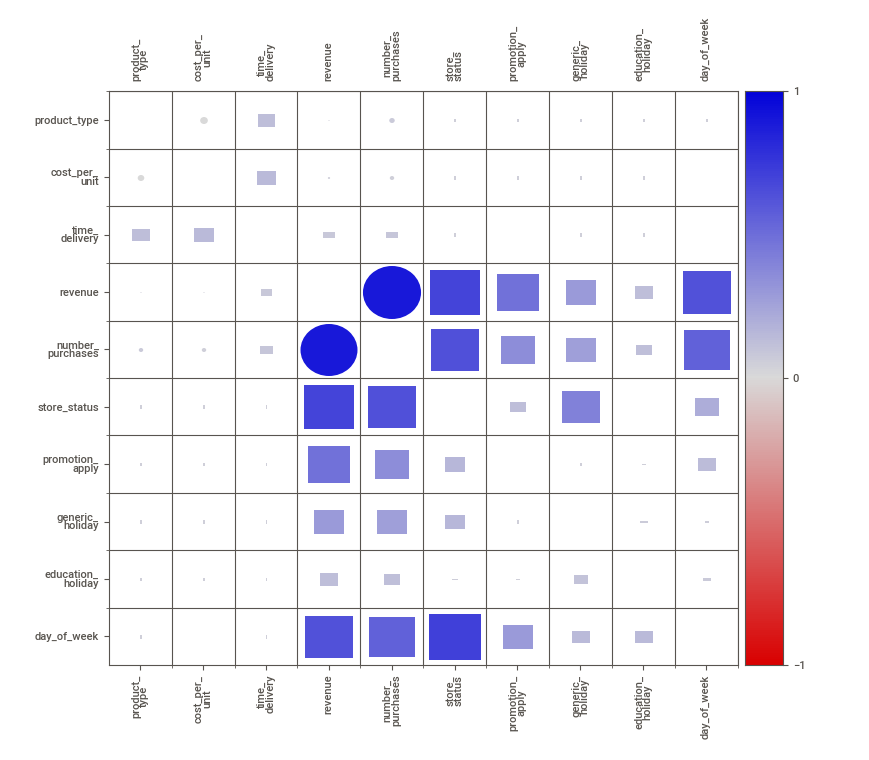
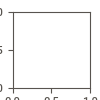


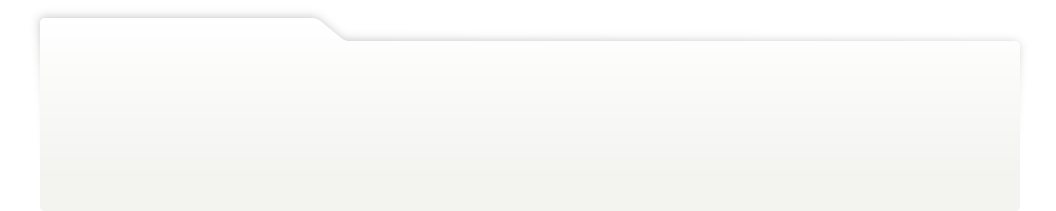
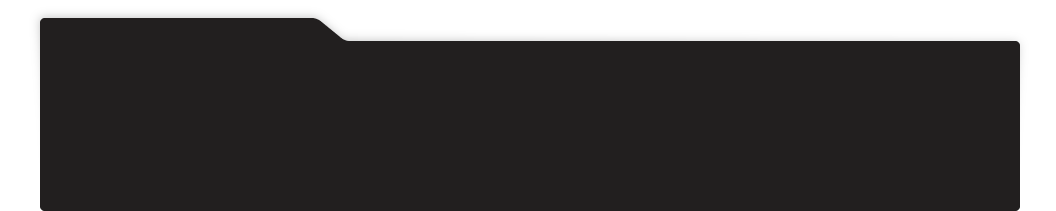
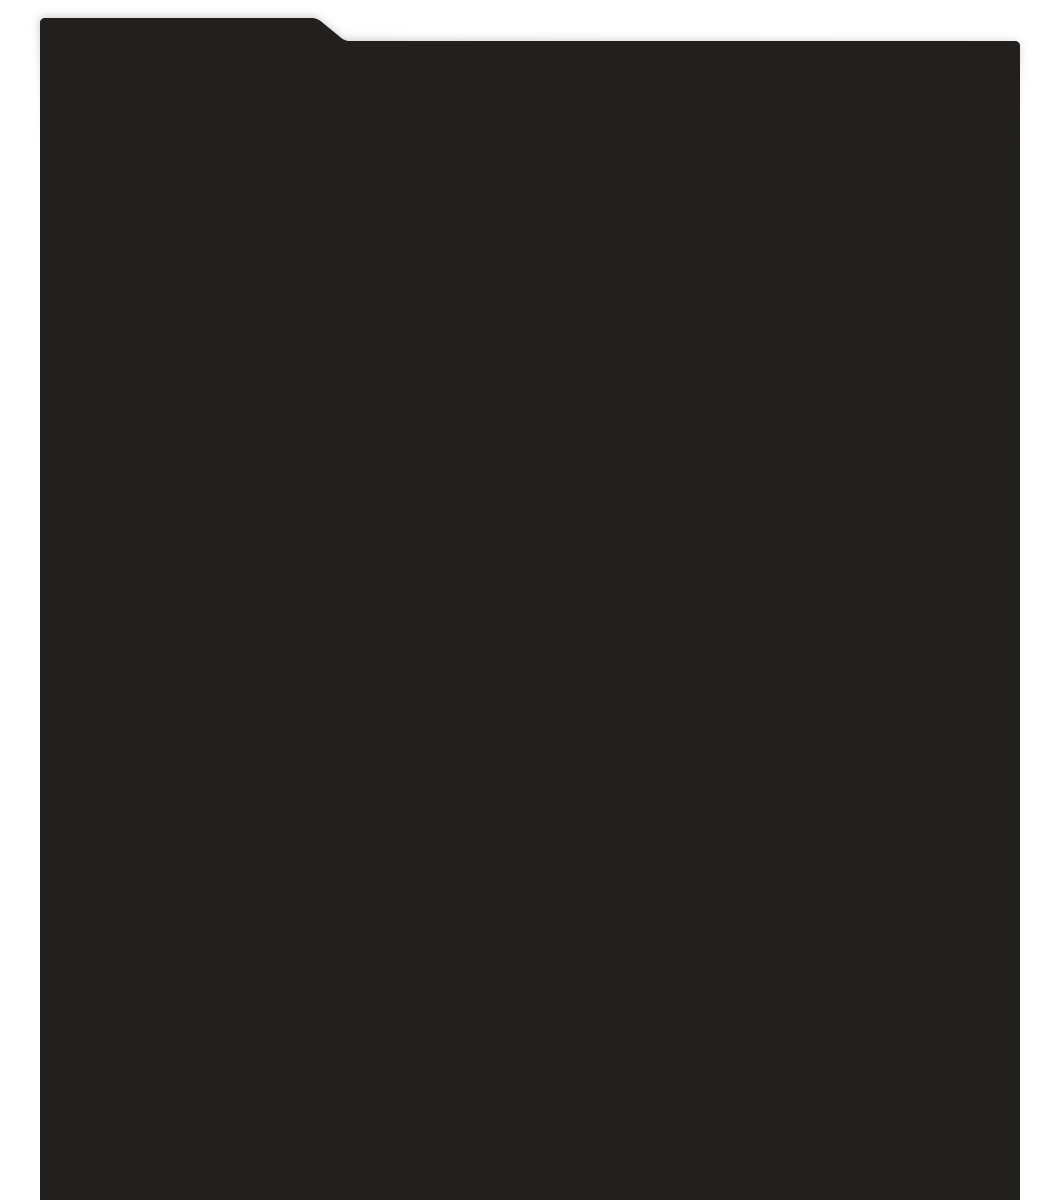
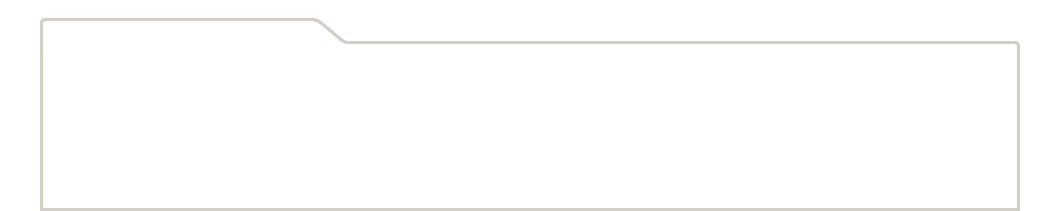
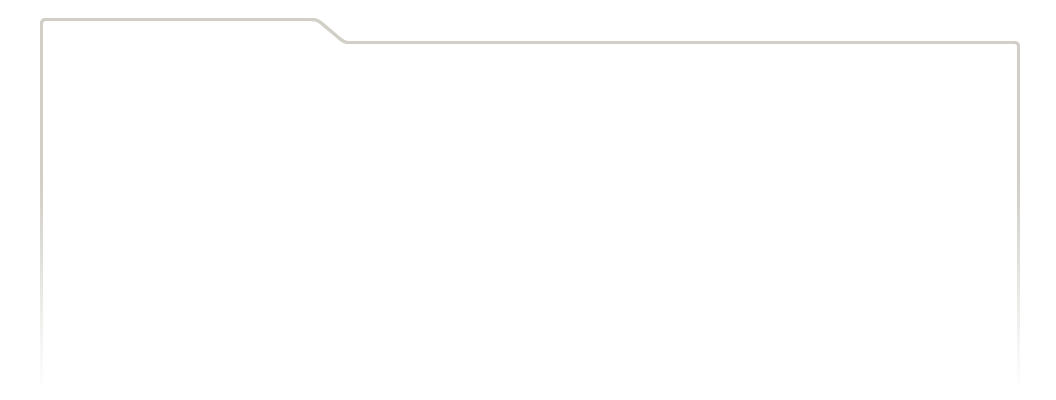
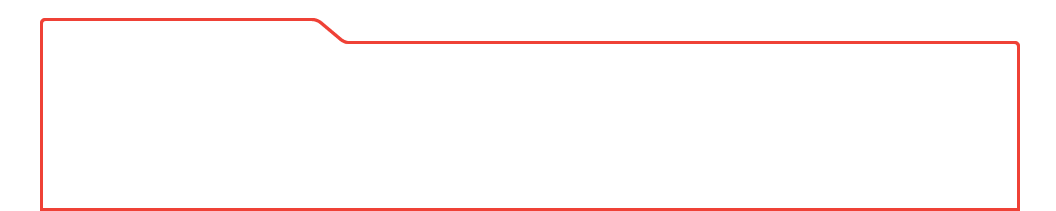
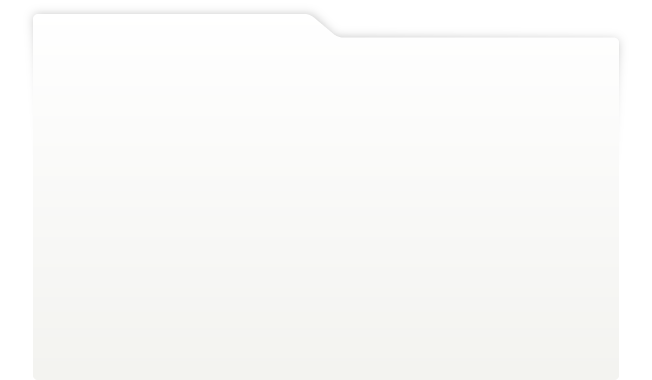
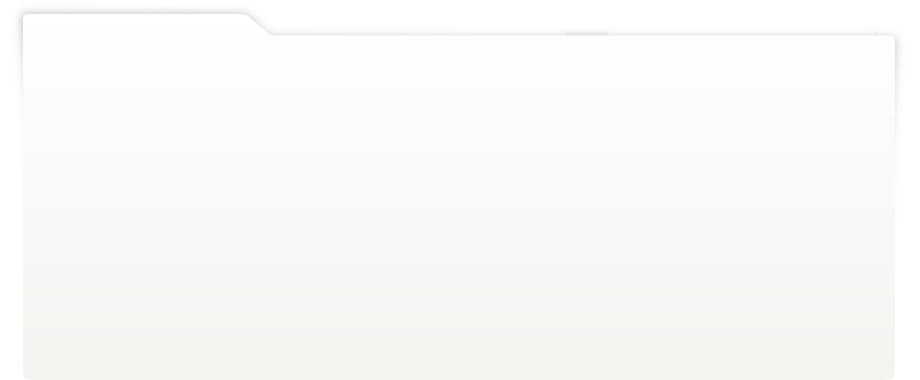
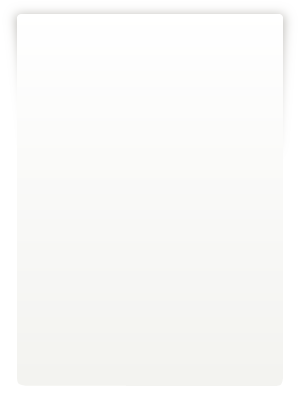
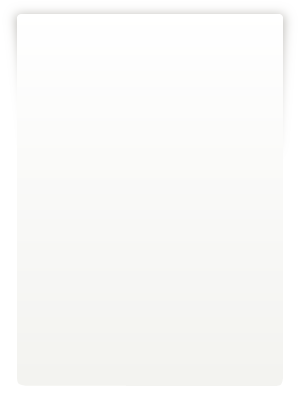
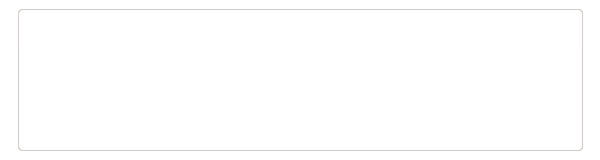
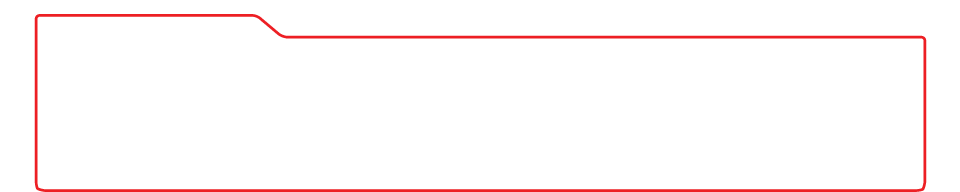
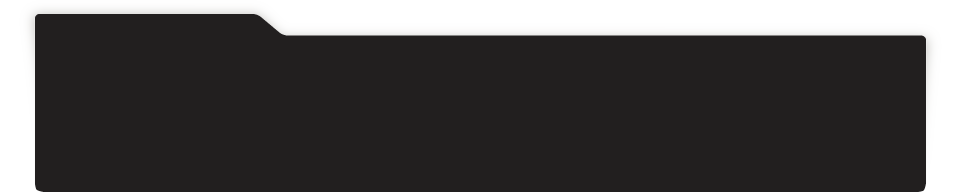
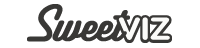
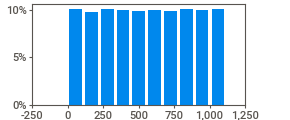
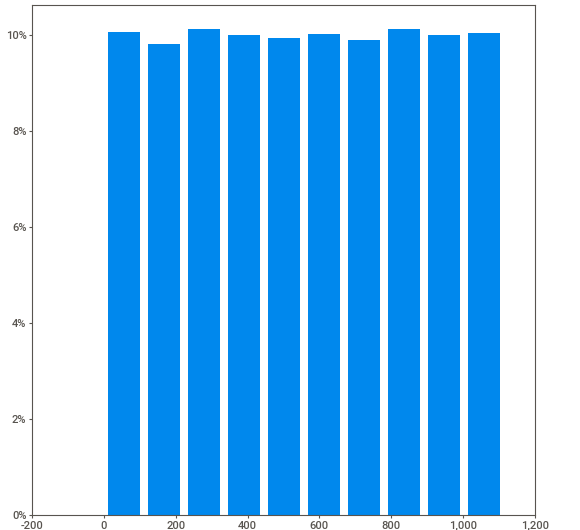
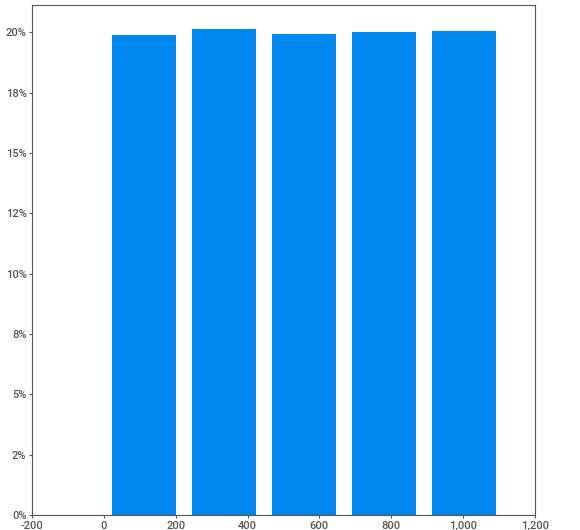
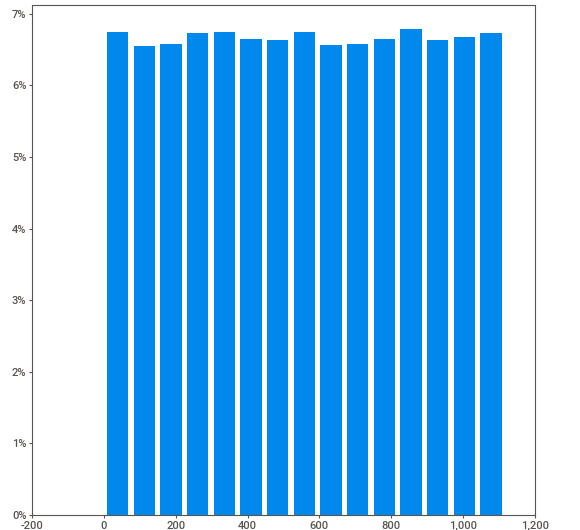
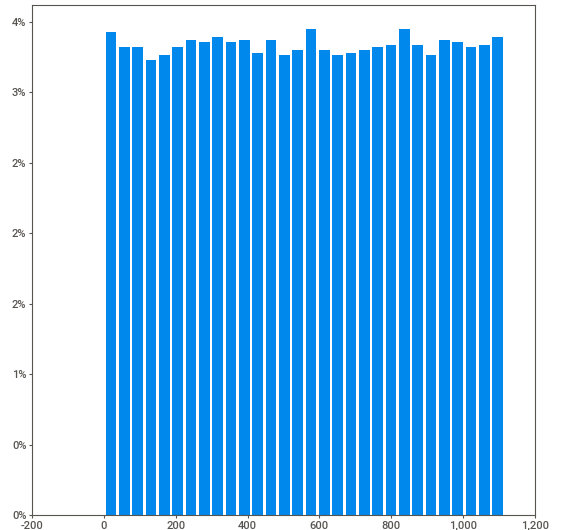
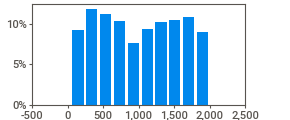
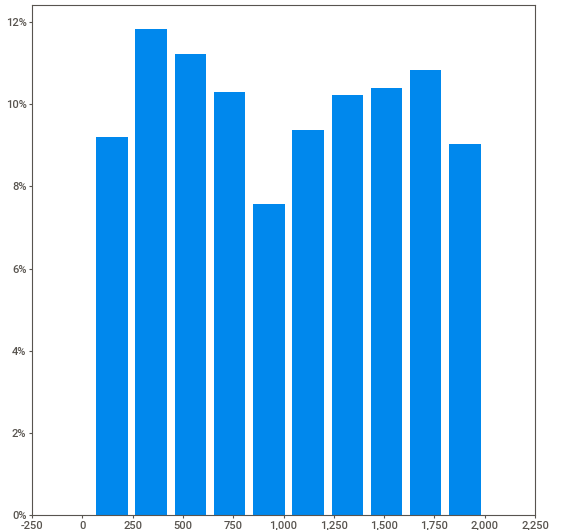
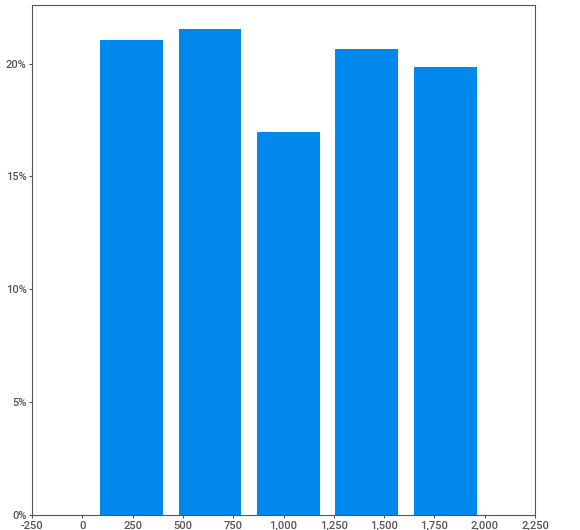
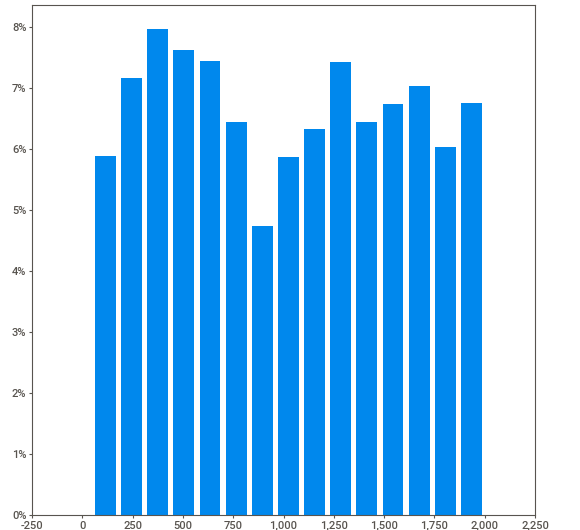
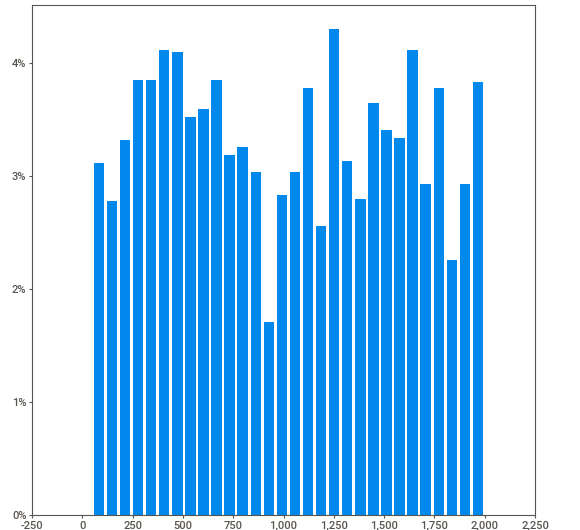
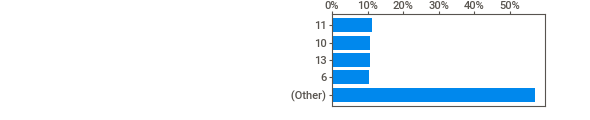
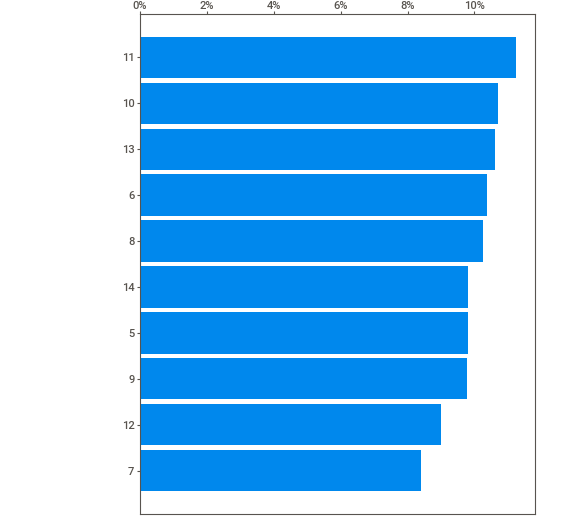
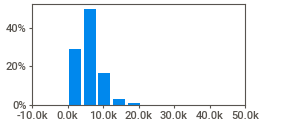
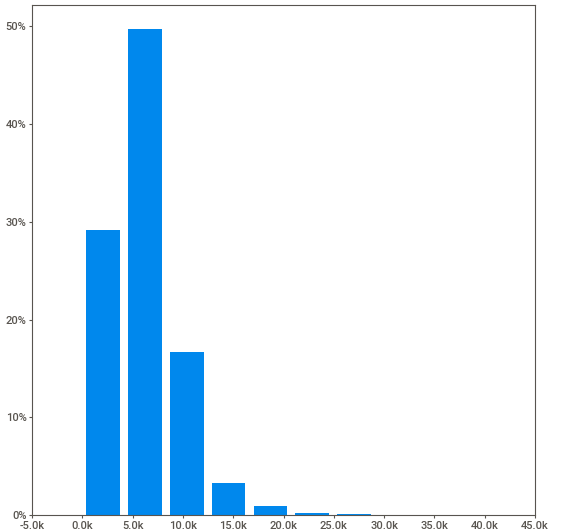
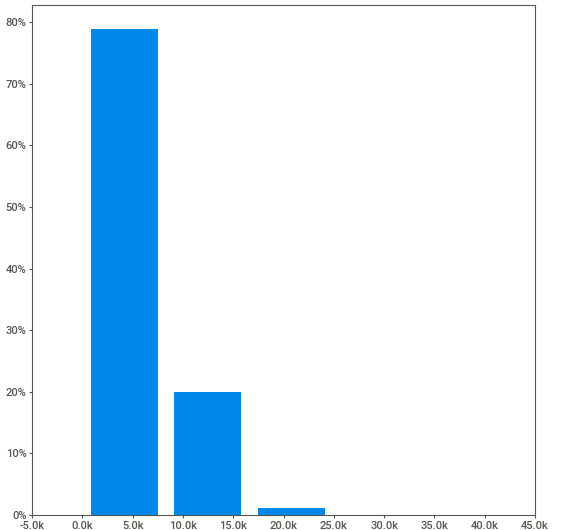
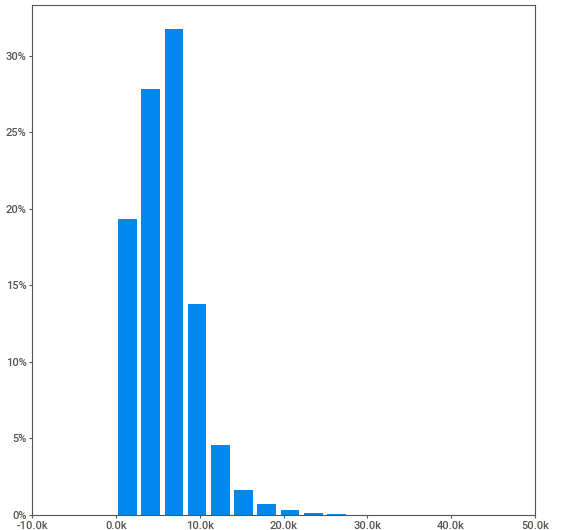
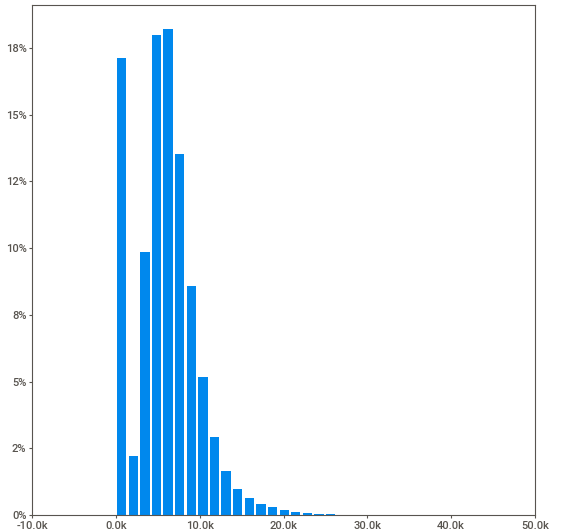
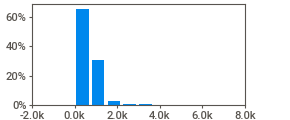
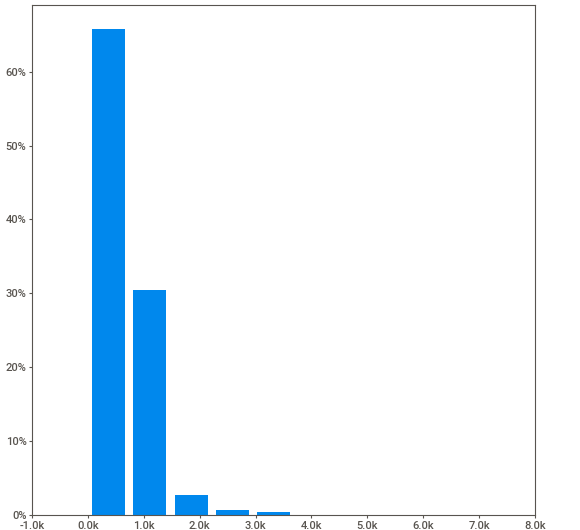
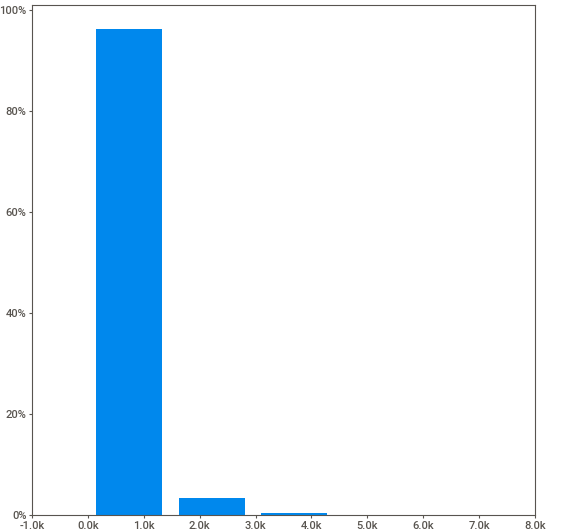
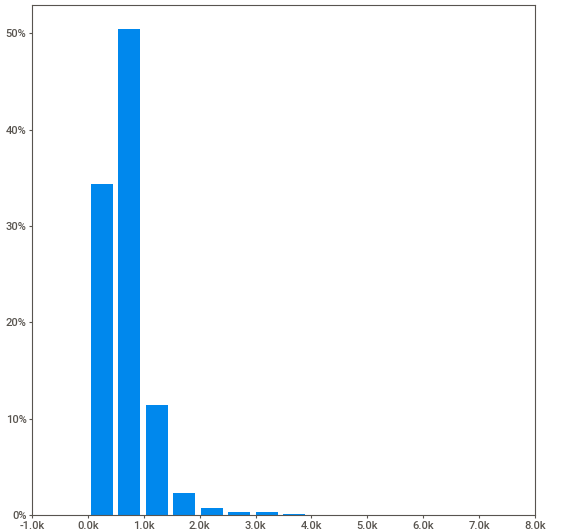
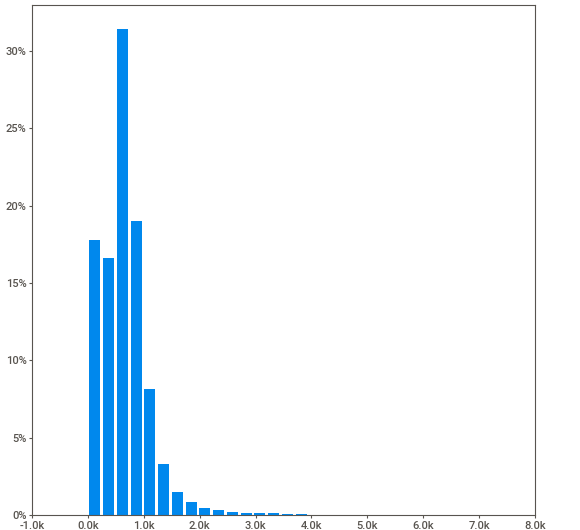
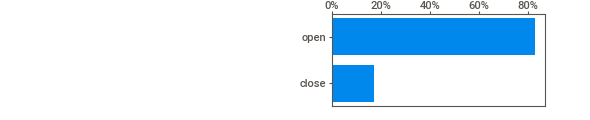
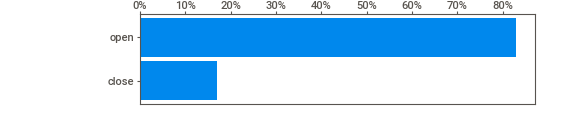
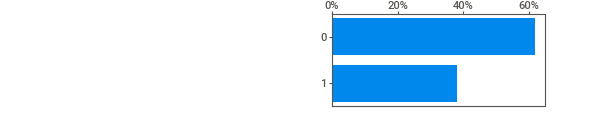
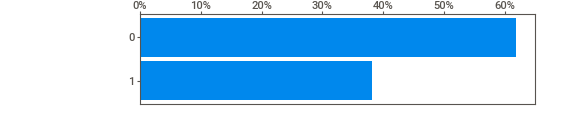
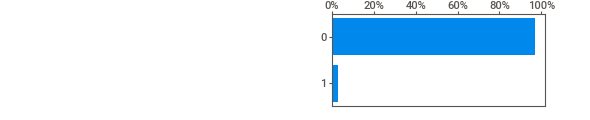
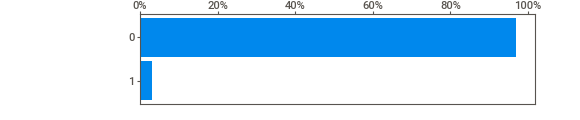
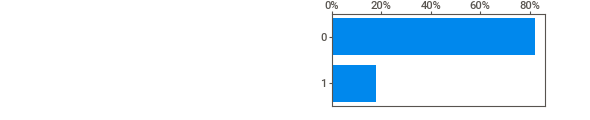
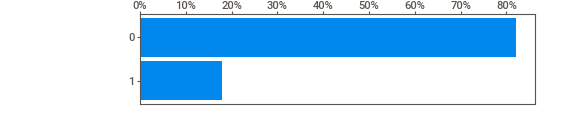
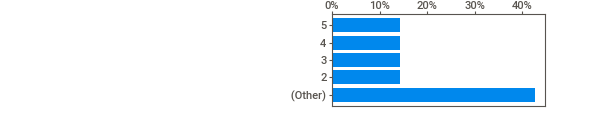
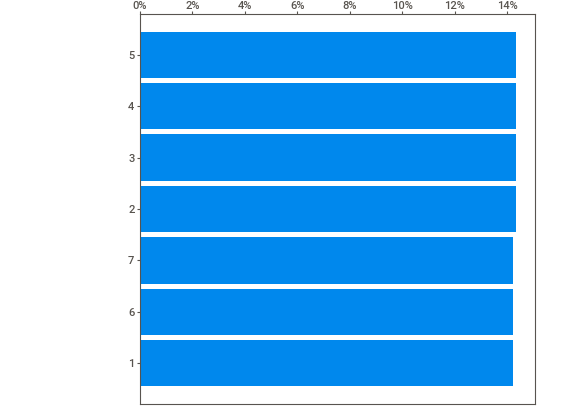
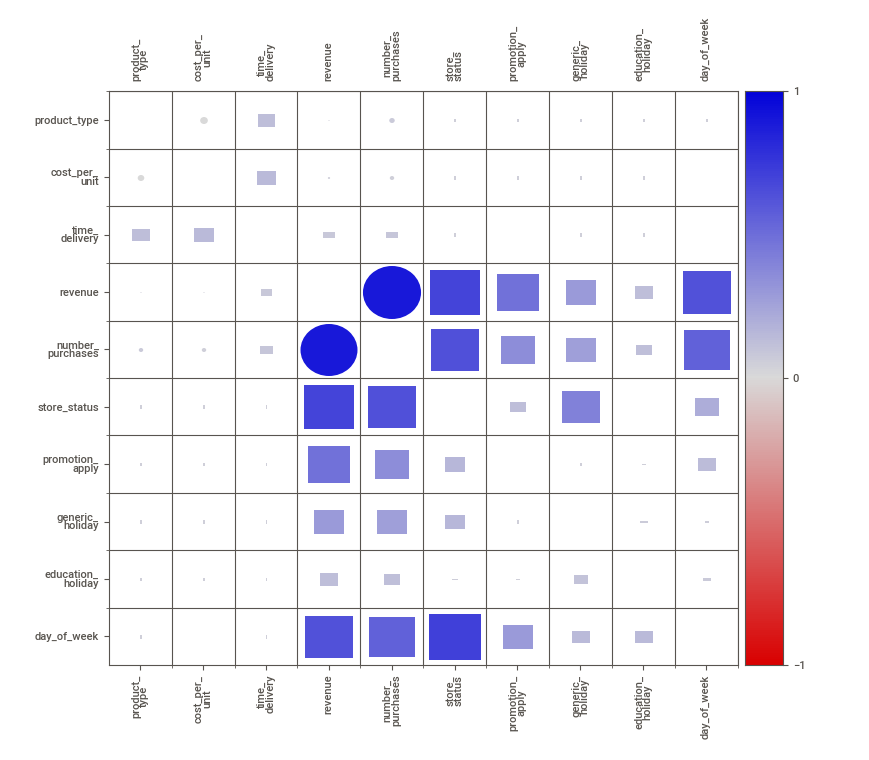
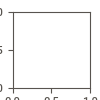

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [18]:
advert_report.show_notebook()
advert_report.show_notebook(w=1500, h=300, scale=0.8)
advert_report.show_html(scale=0.9)

### 3) Distribution of data

In [ ]:
#np.seterr(under='ignore')

{'divide': 'raise', 'invalid': 'raise', 'over': 'raise', 'under': 'raise'}

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


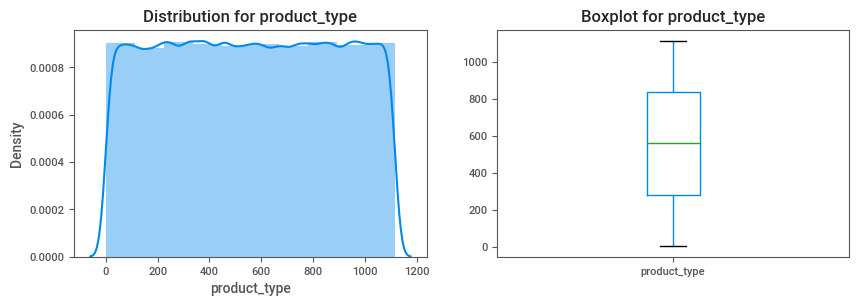

In [ ]:
# product type
plt.subplots(figsize=(10, 3))
plt.subplot(121)
plt.title('Distribution for product_type')
sns.distplot(numerical_col.product_type, hist = True, bins = 10)

plt.subplot(122)
numerical_col.product_type.plot.box()
plt.title('Boxplot for product_type')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


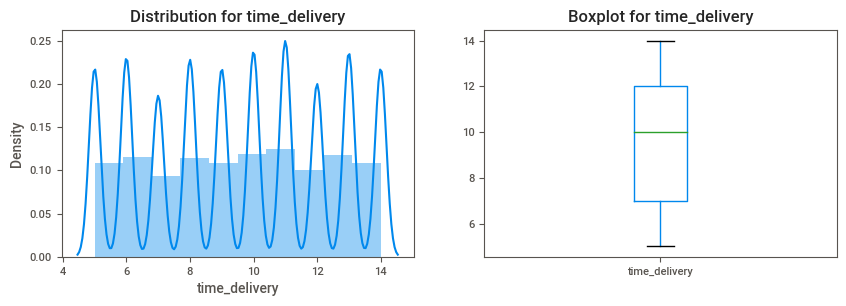

In [ ]:
# time delivery
plt.subplots(figsize=(10, 3))
plt.subplot(121)
plt.title('Distribution for time_delivery')
sns.distplot(numerical_col.time_delivery, hist = True, bins = 10)

plt.subplot(122)
numerical_col.time_delivery.plot.box()
plt.title('Boxplot for time_delivery')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


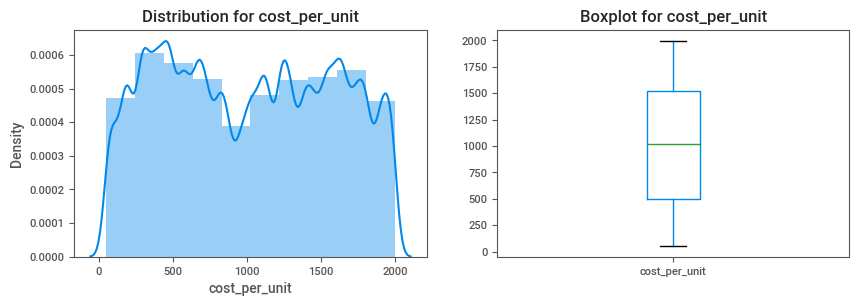

In [ ]:
# cost per unit
plt.subplots(figsize=(10, 3))
plt.subplot(121)
plt.title('Distribution for cost_per_unit')
sns.distplot(numerical_col.cost_per_unit, hist = True, bins = 10)

plt.subplot(122)
numerical_col.cost_per_unit.plot.box()
plt.title('Boxplot for cost_per_unit')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


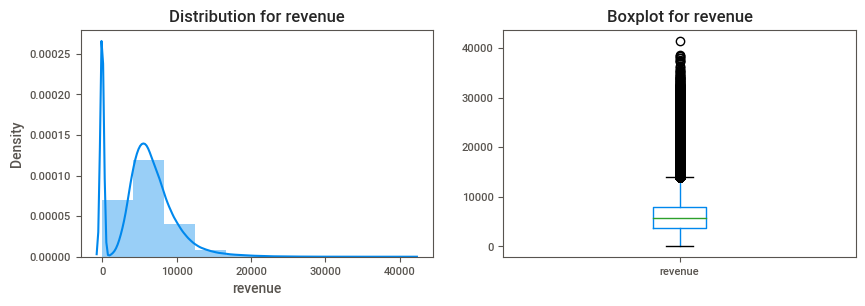

In [ ]:
# revenue
plt.subplots(figsize=(10, 3))
plt.subplot(121)
plt.title('Distribution for revenue')
sns.distplot(numerical_col.revenue, hist = True, bins = 10)

plt.subplot(122)
numerical_col.revenue.plot.box()
plt.title('Boxplot for revenue')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


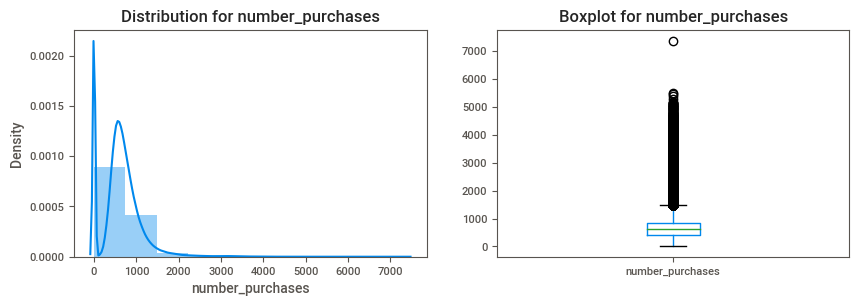

In [ ]:
# number_purchases
plt.subplots(figsize=(10, 3))
plt.subplot(121)
plt.title('Distribution for number_purchases')
sns.distplot(numerical_col.number_purchases, hist = True, bins = 10)

plt.subplot(122)
numerical_col.number_purchases.plot.box()
plt.title('Boxplot for number_purchases')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


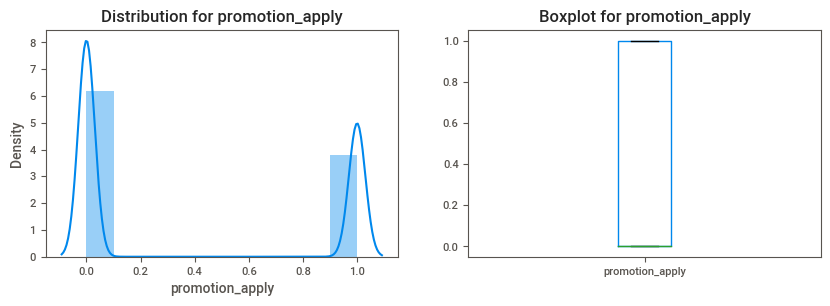

In [ ]:
# promotion apply
plt.subplots(figsize=(10, 3))
plt.subplot(121)
plt.title('Distribution for promotion_apply')
sns.distplot(numerical_col.promotion_apply, hist = True, bins = 10)

plt.subplot(122)
numerical_col.promotion_apply.plot.box()
plt.title('Boxplot for promotion_apply')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


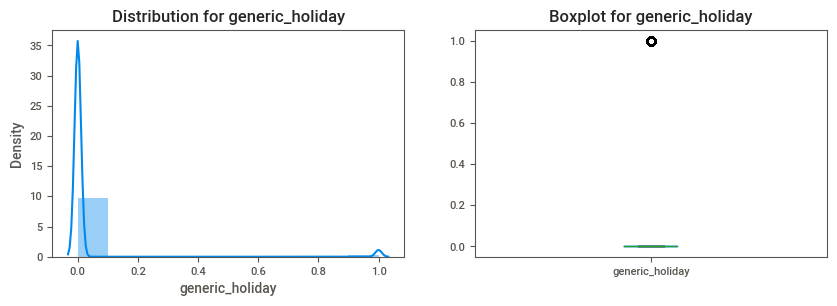

In [ ]:
# generic holiday
plt.subplots(figsize=(10, 3))
plt.subplot(121)
plt.title('Distribution for generic_holiday')
sns.distplot(data.generic_holiday, hist = True, bins = 10)

plt.subplot(122)
data.generic_holiday.plot.box()
plt.title('Boxplot for generic_holiday')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


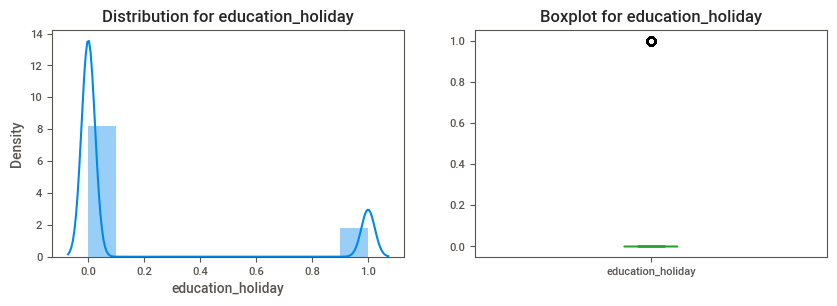

In [ ]:
# education_holiday
plt.subplots(figsize=(10, 3))
plt.subplot(121)
plt.title('Distribution for education_holiday')
sns.distplot(data.education_holiday, hist = True, bins = 10)

plt.subplot(122)
data.education_holiday.plot.box()
plt.title('Boxplot for education_holiday')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


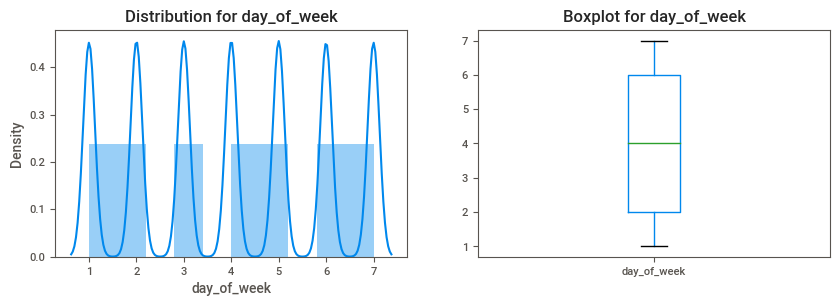

In [ ]:
# day_of_week
plt.subplots(figsize=(10, 3))
plt.subplot(121)
plt.title('Distribution for day_of_week')
sns.distplot(numerical_col.day_of_week, hist = True, bins = 10)

plt.subplot(122)
numerical_col.day_of_week.plot.box()
plt.title('Boxplot for day_of_week')
plt.show()

In [ ]:
#sample_data = data.sample(frac=0.05)
#print(data.shape)
#sample_data.shape

(1017209, 10)


(50860, 10)

## E) Feature encoding

In [ ]:
data.head(3)

,product_type,cost_per_unit,time_delivery,revenue,number_purchases,store_status,promotion_apply,generic_holiday,education_holiday,day_of_week
0,1,457,11,14190,890,1,1,0,1,5
1,1,457,11,5020,546,1,1,0,1,4
2,1,457,11,4782,523,1,1,0,1,3


In [12]:
# label encoding 
from sklearn.preprocessing import LabelBinarizer

label_binar_encoder = LabelBinarizer()
data['store_status'] = label_binar_encoder.fit_transform(data['store_status'])

print(data.info())
data.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   product_type       1017209 non-null  int64 
 1   cost_per_unit      1017209 non-null  int64 
 2   time_delivery      1017209 non-null  int64 
 3   revenue            1017209 non-null  int64 
 4   number_purchases   1017209 non-null  int64 
 5   store_status       1017209 non-null  int64 
 6   promotion_apply    1017209 non-null  int64 
 7   generic_holiday    1017209 non-null  object
 8   education_holiday  1017209 non-null  int64 
 9   day_of_week        1017209 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 85.4+ MB
None


,product_type,cost_per_unit,time_delivery,revenue,number_purchases,store_status,promotion_apply,generic_holiday,education_holiday,day_of_week
0,1,457,11,14190,890,1,1,0,1,5
1,1,457,11,5020,546,1,1,0,1,4
2,1,457,11,4782,523,1,1,0,1,3


## F) EDA III - Findings with dataset

In [20]:
data.aggregate({'product_type': ['max', 'min', 'sum', 'median'],
              'cost_per_unit': ['max', 'min', 'sum', 'median'],
              'time_delivery': ['max', 'min', 'sum', 'median'],
              'day_of_week': ['max', 'min', 'sum', 'median'],
              'revenue': ['max', 'min', 'sum', 'median'],
              'number_purchases': ['max', 'min', 'sum', 'median'],
              'store_status': ['max', 'min', 'sum', 'median'],
              'promotion_apply': ['max', 'min', 'sum', 'median'],
              'generic_holiday': ['max', 'min', 'sum', 'median'],
              'education_holiday': ['max', 'min', 'sum', 'median'],
              'day_of_week': ['max', 'min', 'sum', 'median']})

,product_type,cost_per_unit,time_delivery,day_of_week,revenue,number_purchases,store_status,promotion_apply,generic_holiday,education_holiday
max,1115.0,1.999000e+03,14.0,7.0,4.155100e+04,7388.0,1.0,1.0,1.0,1.0
min,1.0,5.000000e+01,5.0,1.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
sum,568039744.0,1.030271e+09,9707861.0,4067148.0,5.873194e+09,644040154.0,844390.0,388080.0,31050.0,181721.0
median,558.0,1.023000e+03,10.0,4.0,5.744000e+03,609.0,1.0,0.0,0.0,0.0


In [21]:
# Store status with respect to days
data.groupby(['day_of_week','store_status']).size()

day_of_week  store_status
1            0                 7170
             1               137560
2            0                 1703
             1               143961
3            0                 3729
             1               141936
4            0                11201
             1               134644
5            0                 7207
             1               138638
6            0                  672
             1               144058
7            0               141137
             1                 3593
dtype: int64

In [ ]:
data.keys()

Index(['product_type', 'cost_per_unit', 'time_delivery', 'revenue',
       'number_purchases', 'store_status', 'promotion_apply',
       'generic_holiday', 'education_holiday', 'day_of_week'],
      dtype='object')

In [22]:
data.groupby(['day_of_week']).count()

,product_type,cost_per_unit,time_delivery,revenue,number_purchases,store_status,promotion_apply,generic_holiday,education_holiday
day_of_week,,,,,,,,,
1,144730,144730,144730,144730,144730,144730,144730,144730,144730
2,145664,145664,145664,145664,145664,145664,145664,145664,145664
3,145665,145665,145665,145665,145665,145665,145665,145665,145665
4,145845,145845,145845,145845,145845,145845,145845,145845,145845
5,145845,145845,145845,145845,145845,145845,145845,145845,145845
6,144730,144730,144730,144730,144730,144730,144730,144730,144730
7,144730,144730,144730,144730,144730,144730,144730,144730,144730


In [ ]:
#grp_store_status = data.groupby('store_status')
#grp_store_status.get_group('close')

In [ ]:
filterStoreClose = data['store_status'] == 'close'
data.loc[filterStoreClose][['revenue']].describe()

,revenue
count,172819.000000
mean,0.032242
std,13.403412
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5572.000000


In [ ]:
filterStoreOpen = data['store_status'] == 'open'
data.loc[filterStoreOpen][['revenue']].describe()

,revenue
count,844390.000000
mean,6955.540382
std,3104.243552
min,0.000000
25%,4859.000000
50%,6369.000000
75%,8360.000000
max,41551.000000


In [ ]:
data.groupby('store_status').max()

,product_type,cost_per_unit,time_delivery,revenue,number_purchases,promotion_apply,education_holiday,day_of_week
store_status,,,,,,,,
close,1115,1999,14,5572,665,1,1,7
open,1115,1999,14,41551,7388,1,1,7


In [ ]:
data.groupby('store_status').min()

,product_type,cost_per_unit,time_delivery,revenue,number_purchases,promotion_apply,education_holiday,day_of_week
store_status,,,,,,,,
close,1,50,5,0,0,0,0,1
open,1,50,5,0,0,0,0,1


In [ ]:
recordStoreClsoeRevenue = data.loc[((data['revenue'] == 5572) & (data['store_status'] == 'close'))]
recordStoreClsoeRevenue

,product_type,cost_per_unit,time_delivery,revenue,number_purchases,store_status,promotion_apply,generic_holiday,education_holiday,day_of_week
54680,61,722,10,5572,665,close,1,0,1,5


In [ ]:
# Maximum value with respect to days followed by store status
data.groupby(['day_of_week','store_status']).min()

product_type  ...  education_holiday
day_of_week store_status                ...                   
1           close                    1  ...                  0
            open                     1  ...                  0
2           close                    1  ...                  0
            open                     1  ...                  0
3           close                    1  ...                  0
            open                     1  ...                  0
4           close                    1  ...                  0
            open                     1  ...                  0
5           close                    1  ...                  0
            open                     1  ...                  0
6           close                    3  ...                  0
            open                     1  ...                  0
7           close                    1  ...                  0
            open                    85  ...                  0

[14 rows x 7 columns]

In [ ]:
# Maximum value with respect to days followed by store status
data.groupby(['day_of_week','store_status']).max()

product_type  ...  education_holiday
day_of_week store_status                ...                   
1           close                 1115  ...                  1
            open                  1115  ...                  1
2           close                 1115  ...                  1
            open                  1115  ...                  1
3           close                 1115  ...                  1
            open                  1115  ...                  1
4           close                 1115  ...                  1
            open                  1115  ...                  1
5           close                 1115  ...                  1
            open                  1115  ...                  1
6           close                 1112  ...                  1
            open                  1115  ...                  1
7           close                 1115  ...                  1
            open                  1099  ...                  1

[14 rows x 7 columns]

In [ ]:
# promotion codes status with respect to days
data.groupby(['day_of_week','promotion_apply']).size()

day_of_week  promotion_apply
1            0                   66970
             1                   77760
2            0                   68084
             1                   77580
3            0                   68085
             1                   77580
4            0                   68265
             1                   77580
5            0                   68265
             1                   77580
6            0                  144730
7            0                  144730
dtype: int64

In [ ]:
data.groupby(['day_of_week','promotion_apply']).describe()

product_type                          ... education_holiday          
                                   count        mean         std  ...               50%  75%  max
day_of_week promotion_apply                                       ...                            
1           0                    66970.0  558.426101  321.910684  ...               0.0  1.0  1.0
            1                    77760.0  558.428138  321.910520  ...               0.0  0.0  1.0
2           0                    68084.0  558.412814  321.908220  ...               0.0  1.0  1.0
            1                    77580.0  558.459783  321.913148  ...               0.0  0.0  1.0
3           0                    68085.0  558.419123  321.910066  ...               0.0  1.0  1.0
            1                    77580.0  558.459783  321.913148  ...               0.0  0.0  1.0
4           0                    68265.0  558.383183  321.907075  ...               0.0  1.0  1.0
            1                    77580.0  558.459783  321.913148  ...               0.0  0.0  1.0
5           0                    68265.0  558.383183  321.907075  ...               0.0  1.0  1.0
            1                    77580.0  558.459783  321.913148  ...               0.0  0.0  1.0
6           0                   144730.0  558.427195  321.909484  ...               0.0  0.0  1.0
7           0                   144730.0  558.427195  321.909484  ...               0.0  0.0  1.0

[12 rows x 48 columns]

In [ ]:
filterPromotionN = data['promotion_apply'] == 0
data.loc[filterPromotionN][['revenue', 'day_of_week', 'product_type', 'cost_per_unit', 'number_purchases']].describe()

,revenue,day_of_week,product_type,cost_per_unit,number_purchases
count,629129.000000,629129.000000,629129.000000,629129.000000,629129.000000
mean,4406.050805,4.614742,558.415098,1012.837509,517.823542
std,3442.450020,2.054354,321.907480,565.500020,452.881419
min,0.000000,1.000000,1.000000,50.000000,0.000000
25%,0.000000,3.000000,280.000000,502.000000,0.000000
50%,4622.000000,5.000000,558.000000,1023.000000,512.000000
75%,6367.000000,6.000000,838.000000,1519.000000,726.000000
max,41551.000000,7.000000,1115.000000,1999.000000,5387.000000


In [ ]:
filterPromotionY = data['promotion_apply'] == 1
data.loc[filterPromotionY][['revenue', 'day_of_week', 'product_type', 'cost_per_unit', 'number_purchases']].describe()

,revenue,day_of_week,product_type,cost_per_unit,number_purchases
count,388080.000000,388080.000000,388080.000000,388080.000000,388080.000000
mean,7991.187327,2.999072,558.453443,1012.846666,820.094689
std,3419.083532,1.414543,321.910963,565.504920,419.898481
min,0.000000,1.000000,1.000000,50.000000,0.000000
25%,5922.000000,2.000000,280.000000,502.000000,581.000000
50%,7553.000000,3.000000,558.000000,1023.000000,747.000000
75%,9603.000000,4.000000,838.000000,1519.000000,972.000000
max,38722.000000,5.000000,1115.000000,1999.000000,7388.000000


In [ ]:
# Generic holiday counts with respect to days
data.groupby(['day_of_week','generic_holiday']).size()

day_of_week  generic_holiday
1            1                    6999
             0                  137731
2            1                    1423
             0                  144241
3            1                    3495
             0                  142170
4            1                   11349
             0                  134496
5            1                    7076
             0                  138769
6            1                     399
             0                  144331
7            1                     309
             0                  144421
dtype: int64

In [ ]:
data.groupby(['day_of_week','generic_holiday']).describe()

product_type                          ... education_holiday          
                                   count        mean         std  ...               50%  75%  max
day_of_week generic_holiday                                       ...                            
1           1                     6999.0  557.552650  321.653477  ...               0.0  1.0  1.0
            0                   137731.0  558.471637  321.923591  ...               0.0  0.0  1.0
2           1                     1423.0  555.497540  320.695265  ...               1.0  1.0  1.0
            0                   144241.0  558.466837  321.922673  ...               0.0  0.0  1.0
3           1                     3495.0  562.511588  323.131727  ...               1.0  1.0  1.0
            0                   142170.0  558.340705  321.881018  ...               0.0  0.0  1.0
4           1                    11349.0  560.314477  322.086424  ...               0.0  1.0  1.0
            0                   134496.0  558.264402  321.894935  ...               0.0  0.0  1.0
5           1                     7076.0  559.284765  322.456635  ...               1.0  1.0  1.0
            0                   138769.0  558.380034  321.882367  ...               0.0  0.0  1.0
6           1                      399.0  564.471178  325.301041  ...               0.0  0.0  0.0
            0                   144331.0  558.410487  321.901040  ...               0.0  0.0  1.0
7           1                      309.0  547.867314  316.700161  ...               0.0  0.0  0.0
            0                   144421.0  558.449789  321.921246  ...               0.0  0.0  1.0

[14 rows x 56 columns]

In [ ]:
filterGHolidayN = data['generic_holiday'] == 0
data.loc[filterGHolidayN][['revenue', 'day_of_week', 'product_type', 'cost_per_unit', 'number_purchases']].describe()

,revenue,day_of_week,product_type,cost_per_unit,number_purchases
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [ ]:
filterGHolidayY = data['generic_holiday'] == 1
data.loc[filterGHolidayY][['revenue', 'day_of_week', 'product_type', 'cost_per_unit', 'number_purchases']].describe()

,revenue,day_of_week,product_type,cost_per_unit,number_purchases
count,31050.000000,31050.000000,31050.000000,31050.000000,31050.000000
mean,258.159581,3.402995,559.413366,1012.551852,40.056683
std,1813.752718,1.528755,322.091886,565.403131,293.037956
min,0.000000,1.000000,1.000000,50.000000,0.000000
25%,0.000000,2.000000,281.000000,497.000000,0.000000
50%,0.000000,4.000000,561.000000,1024.000000,0.000000
75%,0.000000,5.000000,839.000000,1516.000000,0.000000
max,38722.000000,7.000000,1115.000000,1999.000000,5494.000000


In [ ]:
data.groupby(['day_of_week','education_holiday']).size()

day_of_week  education_holiday
1            0                    110670
             1                     34060
2            0                    109069
             1                     36595
3            0                    111029
             1                     34636
4            0                    111098
             1                     34747
5            0                    109610
             1                     36235
6            0                    142006
             1                      2724
7            0                    142006
             1                      2724
dtype: int64

In [ ]:
# Maximum value with respect to days followed by generic holidays
data.groupby(['day_of_week','education_holiday']).describe()

product_type              ... promotion_apply     
                                     count        mean  ...             75%  max
day_of_week education_holiday                           ...                     
1           0                     110670.0  558.145794  ...             1.0  1.0
            1                      34060.0  559.341544  ...             1.0  1.0
2           0                     109069.0  558.112067  ...             1.0  1.0
            1                      36595.0  559.408744  ...             1.0  1.0
3           0                     111029.0  558.383269  ...             1.0  1.0
            1                      34636.0  558.625130  ...             1.0  1.0
4           0                     111098.0  558.394030  ...             1.0  1.0
            1                      34747.0  558.519527  ...             1.0  1.0
5           0                     109610.0  558.218913  ...             1.0  1.0
            1                      36235.0  559.044101  ...             1.0  1.0
6           0                     142006.0  558.492866  ...             0.0  0.0
            1                       2724.0  555.003671  ...             0.0  0.0
7           0                     142006.0  558.492866  ...             0.0  0.0
            1                       2724.0  555.003671  ...             0.0  0.0

[14 rows x 48 columns]

In [ ]:
filterGHolidayN = data['education_holiday'] == 0
data.loc[filterGHolidayN][['revenue', 'day_of_week', 'product_type', 'cost_per_unit', 'number_purchases']].describe()

,revenue,day_of_week,product_type,cost_per_unit,number_purchases
count,835488.000000,835488.000000,835488.000000,835488.000000,835488.000000
mean,5620.969421,4.189665,558.333533,1012.467877,617.644543
std,3862.877154,2.037653,321.968908,565.503294,466.575199
min,0.000000,1.000000,1.000000,50.000000,0.000000
25%,3506.000000,2.000000,280.000000,502.000000,382.000000
50%,5642.000000,4.000000,558.000000,1017.000000,599.000000
75%,7749.000000,6.000000,837.000000,1519.000000,827.000000
max,41551.000000,7.000000,1115.000000,1999.000000,7388.000000


In [ ]:
filterGHolidayN = data['education_holiday'] == 1
data.loc[filterGHolidayN][['revenue', 'day_of_week', 'product_type', 'cost_per_unit', 'number_purchases']].describe()

,revenue,day_of_week,product_type,cost_per_unit,number_purchases
count,181721.000000,181721.000000,181721.000000,181721.000000,181721.000000
mean,6476.641748,3.118698,558.871991,1014.556496,704.407031
std,3709.793011,1.516767,321.631983,565.492261,447.476357
min,0.000000,1.000000,1.000000,50.000000,0.000000
25%,4447.000000,2.000000,281.000000,502.000000,480.000000
50%,6197.000000,3.000000,559.000000,1025.000000,654.000000
75%,8343.000000,4.000000,838.000000,1521.000000,881.000000
max,38367.000000,7.000000,1115.000000,1999.000000,5192.000000


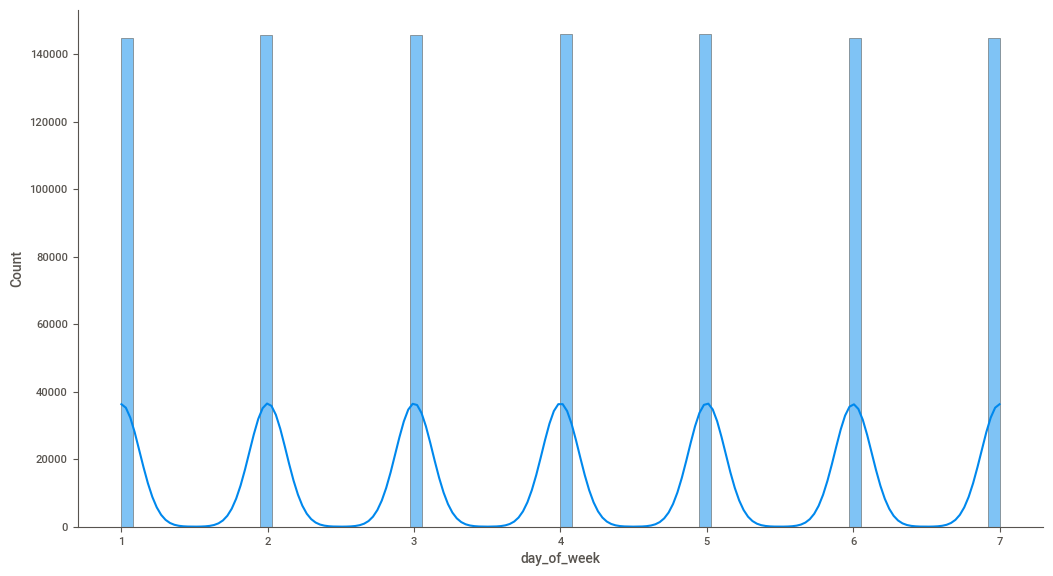

In [ ]:
g = sns.displot(data=data, x="day_of_week", kde=True)
g.fig.set_figwidth(12)
g.fig.set_figheight(6)

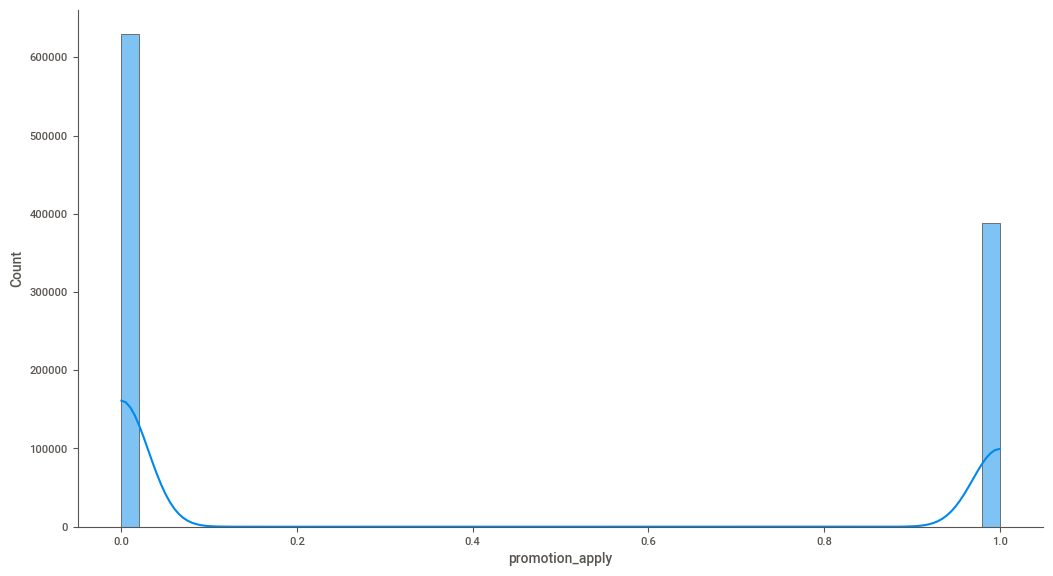

In [ ]:
g = sns.displot(data=data, x="promotion_apply", kde=True)
g.fig.set_figwidth(12)
g.fig.set_figheight(6)

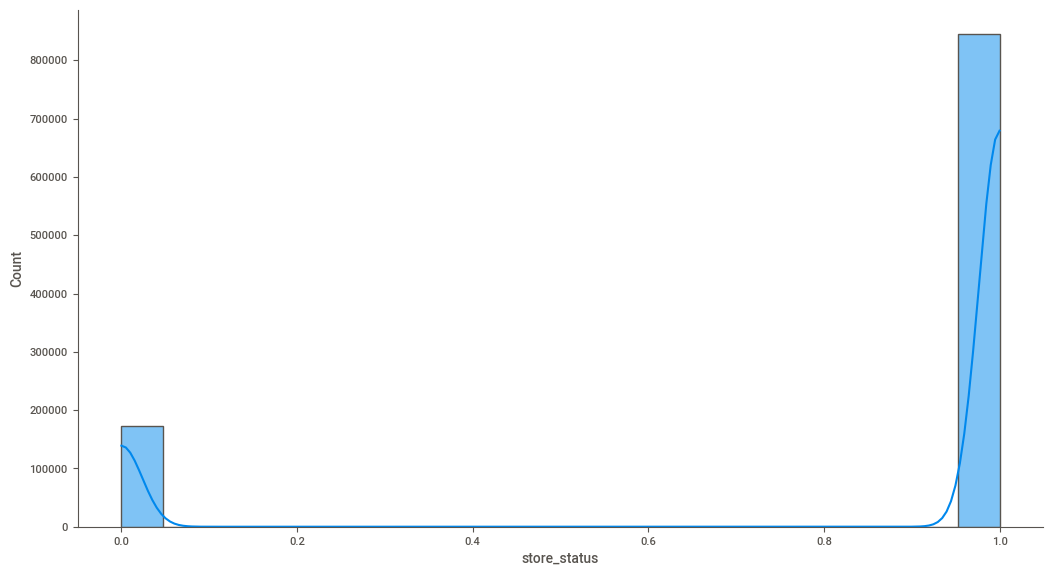

In [ ]:
g = sns.displot(data=data, x="store_status", kde=True)
g.fig.set_figwidth(12)
g.fig.set_figheight(6)

In [ ]:
data.keys()

Index(['product_type', 'cost_per_unit', 'time_delivery', 'revenue',
       'number_purchases', 'store_status', 'promotion_apply',
       'generic_holiday', 'education_holiday', 'day_of_week'],
      dtype='object')

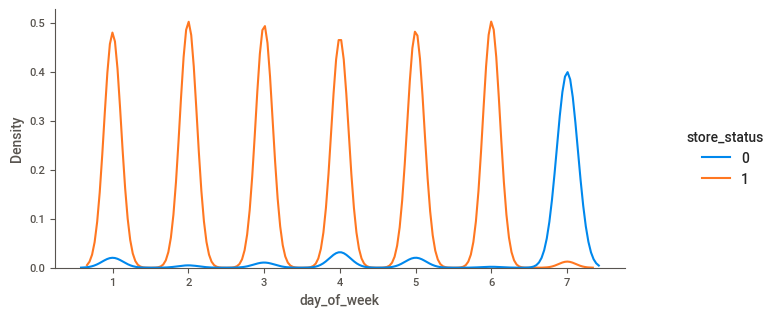

In [ ]:
g = sns.displot(data=data, x="day_of_week", hue="store_status", kind="kde")
g.fig.set_figwidth(8)
g.fig.set_figheight(3)

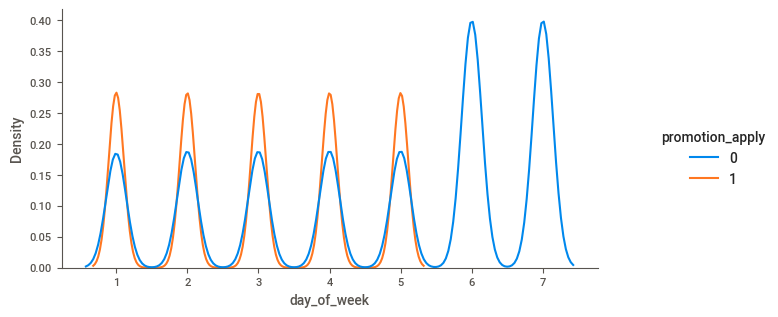

In [ ]:
g = sns.displot(data=data, x="day_of_week", hue="promotion_apply", kind="kde")
g.fig.set_figwidth(8)
g.fig.set_figheight(3)

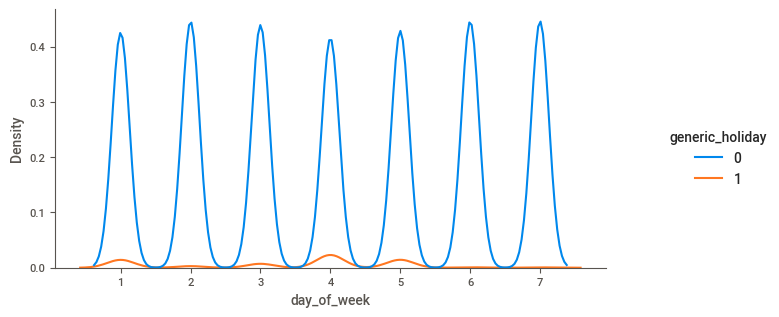

In [ ]:
g = sns.displot(data=data, x="day_of_week", hue="generic_holiday", kind="kde")
g.fig.set_figwidth(8)
g.fig.set_figheight(3)

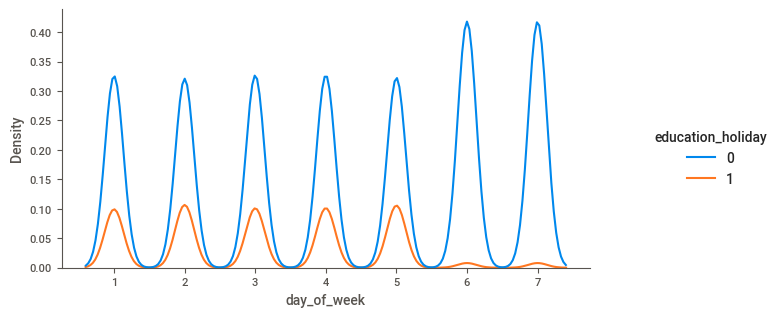

In [ ]:
g = sns.displot(data=data, x="day_of_week", hue="education_holiday", kind="kde")
g.fig.set_figwidth(8)
g.fig.set_figheight(3)

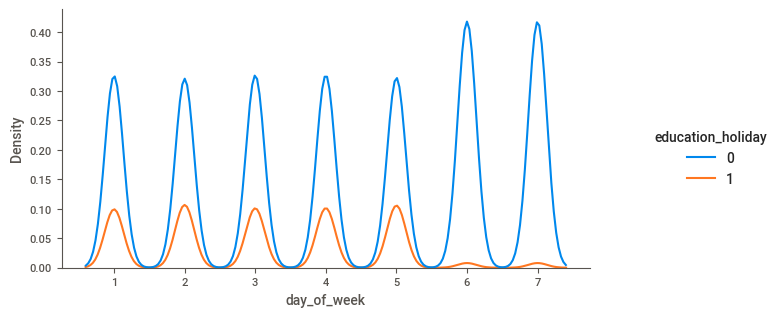

In [ ]:
g = sns.displot(data=data, x="day_of_week", hue="education_holiday", kind="kde")
g.fig.set_figwidth(8)
g.fig.set_figheight(3)

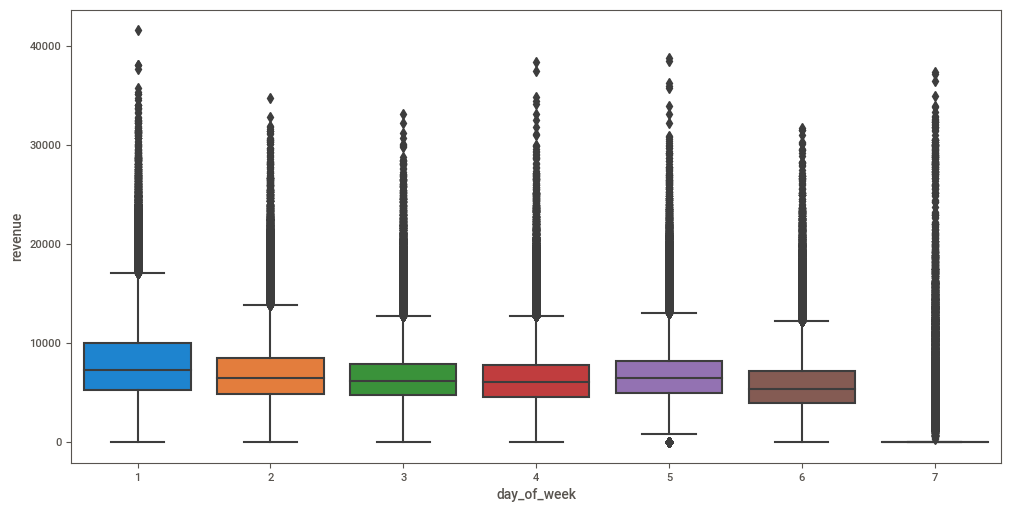

In [ ]:
plt.figure(figsize =(12, 6))
sns.boxplot(x="day_of_week", y="revenue", data=data)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
product_type,1017209.00,558.43,321.91,1.00,280.00,558.00,838.00,1115.00
cost_per_unit,1017209.00,1012.84,565.50,50.00,502.00,1023.00,1519.00,1999.00
time_delivery,1017209.00,9.54,2.86,5.00,7.00,10.00,12.00,14.00
revenue,1017209.00,5773.83,3849.95,0.00,3727.00,5744.00,7856.00,41551.00
number_purchases,1017209.00,633.14,464.41,0.00,405.00,609.00,837.00,7388.00
store_status,1017209.00,0.83,0.38,0.00,1.00,1.00,1.00,1.00
promotion_apply,1017209.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
generic_holiday,1017209.00,0.03,0.17,0.00,0.00,0.00,0.00,1.00
education_holiday,1017209.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
day_of_week,1017209.00,4.00,2.00,1.00,2.00,4.00,6.00,7.00


In [ ]:
daybyweek = data.groupby(['day_of_week']).agg({'revenue':'count'})
print(daybyweek)

             revenue
day_of_week         
1             144730
2             145664
3             145665
4             145845
5             145845
6             144730
7             144730


In [ ]:
daybyweek = data.groupby(['day_of_week']).agg({'revenue':'sum'})
print(daybyweek)

                revenue
day_of_week            
1            1130203012
2            1020411930
3             954962863
4             911177709
5             980569633
6             846317735
7              29551433


In [ ]:
day = data.groupby(['day_of_week','generic_holiday' ]).agg({'revenue':'sum'})
print(day)

                                revenue
day_of_week generic_holiday            
1           1                   1621841
            0                1128581171
2           1                    121053
            0                1020290877
3           1                    461665
            0                 954501198
4           1                   4151661
            0                 907026048
5           1                   1555389
            0                 979014244
6           1                     94292
            0                 846223443
7           1                      9954
            0                  29541479


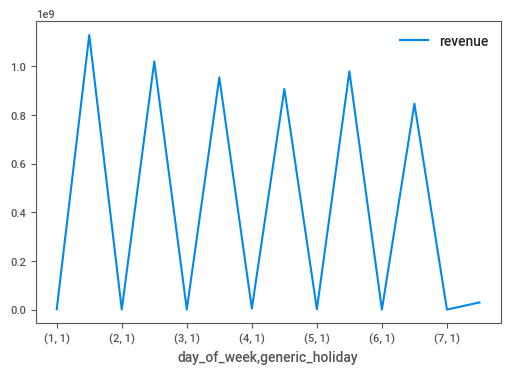

In [ ]:
day.plot()

In [ ]:
storetotal = data.groupby(['day_of_week']).agg({'number_purchases':'sum'})
storetotal

,number_purchases
day_of_week,
1,117675012
2,110848063
3,105117642
4,101732938
5,108383219
6,95103854
7,5179426


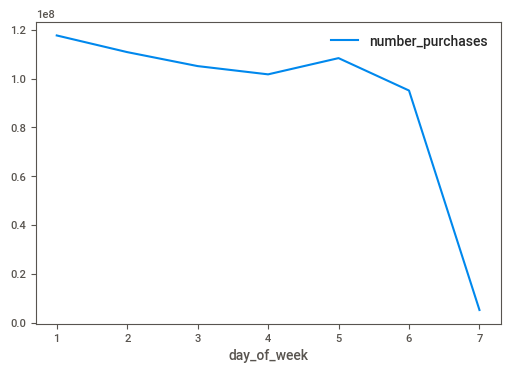

In [ ]:
storetotal.plot()

In [ ]:
agg_year_store = pd.pivot_table(sample_data, index='day_of_week', columns='generic_holiday',
                                values='revenue', aggfunc=np.mean).values

In [ ]:
agg_year_store

array([[8203.91878461,  144.14594595,  141.85625   ,           nan],
       [7099.65571945,    0.        ,           nan,           nan],
       [6727.43674399,  352.83898305,           nan,  181.02083333],
       [6827.57777778,  400.88169643,           nan,  160.65322581],
       [7022.00187916,  349.13114754,   40.83625731,  225.89583333],
       [5830.24434577,    0.        ,           nan,           nan],
       [ 218.18045322,    0.        ,           nan,           nan]])

Text(0, 0.5, 'Relative Sales')

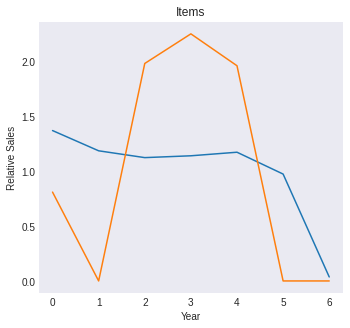

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_year_store / agg_year_store.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Year")
plt.ylabel("Relative Sales")

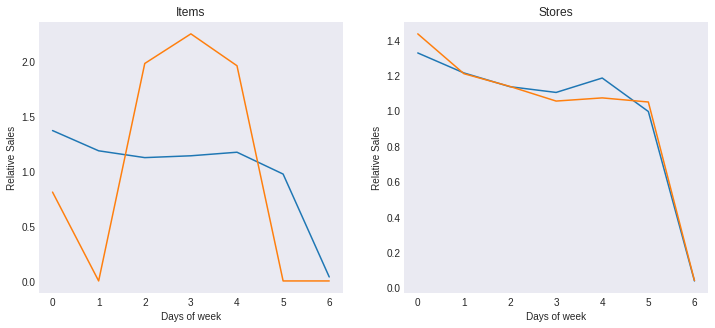

In [ ]:
agg_weekly_item = pd.pivot_table(sample_data, index='day_of_week', columns='generic_holiday',
                               values='revenue', aggfunc=np.mean).values
agg_weekly_store = pd.pivot_table(sample_data, index='day_of_week', columns='education_holiday',
                                values='revenue', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_weekly_item / agg_weekly_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Days of week")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_weekly_store / agg_weekly_store.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Days of week")
plt.ylabel("Relative Sales")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


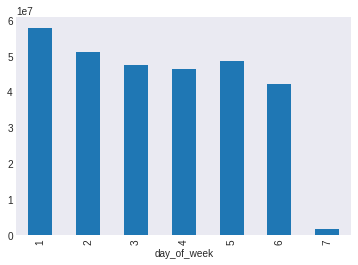

In [ ]:
art_year = sample_data.groupby('day_of_week')["cost_per_unit", "revenue"].sum()
art_year['revenue'].plot(kind='bar')

In [ ]:
data.groupby(['day_of_week','store_status','generic_holiday']).max()

product_type  ...  education_holiday
day_of_week store_status generic_holiday                ...                   
1           close        0                        1100  ...                  1
                         1                        1115  ...                  1
            open         0                        1115  ...                  1
                         1                        1099  ...                  1
2           close        0                        1100  ...                  1
                         1                        1115  ...                  1
            open         0                        1115  ...                  1
                         1                        1097  ...                  1
3           close        0                        1100  ...                  1
                         1                        1115  ...                  1
            open         0                        1115  ...                  1
                         1                        1097  ...                  1
4           close        0                        1110  ...                  1
                         1                        1115  ...                  1
            open         0                        1115  ...                  1
                         1                        1108  ...                  1
5           close        0                        1100  ...                  1
                         1                        1115  ...                  1
            open         0                        1115  ...                  1
                         1                        1099  ...                  1
6           close        0                        1100  ...                  1
                         1                        1112  ...                  0
            open         0                        1115  ...                  1
                         1                        1097  ...                  0
7           close        0                        1115  ...                  1
                         1                        1109  ...                  0
            open         0                        1099  ...                  1
                         1                         948  ...                  0

[28 rows x 7 columns]

In [ ]:
#data.groupby(['product_type']).count()
pp = data.groupby('product_type', 'day_of_week' ==1).count()
pp

,cost_per_unit,time_delivery,revenue,number_purchases,store_status,promotion_apply,generic_holiday,education_holiday,day_of_week
product_type,,,,,,,,,
1,942,942,942,942,942,942,942,942,942
2,942,942,942,942,942,942,942,942,942
3,942,942,942,942,942,942,942,942,942
4,942,942,942,942,942,942,942,942,942
5,942,942,942,942,942,942,942,942,942
...,...,...,...,...,...,...,...,...,...
1111,942,942,942,942,942,942,942,942,942
1112,942,942,942,942,942,942,942,942,942
1113,942,942,942,942,942,942,942,942,942


## G) Expt: On samples

In [ ]:
data.head()

,product_type,cost_per_unit,time_delivery,revenue,number_purchases,store_status,promotion_apply,generic_holiday,education_holiday,day_of_week
0,1,457,11,14190,890,1,1,0,1,5
1,1,457,11,5020,546,1,1,0,1,4
2,1,457,11,4782,523,1,1,0,1,3
3,1,457,11,5011,560,1,1,0,1,2
4,1,457,11,6102,612,1,1,0,1,1


In [13]:
# taking 5% of samples
sample_data = data.sample(frac=0.05)
print(data.shape)
sample_data.shape

(1017209, 10)


(50860, 10)

In [14]:
sample_data['number_of_units'] = sample_data['revenue'] / sample_data['cost_per_unit']
sample_data.head()

,product_type,cost_per_unit,time_delivery,revenue,number_purchases,store_status,promotion_apply,generic_holiday,education_holiday,day_of_week,number_of_units
522695,574,1045,10,8405,617,1,0,0,0,6,8.043062
663679,729,1697,13,0,0,0,0,0,0,7,0.000000
17087,19,1967,5,7365,710,1,1,0,0,5,3.744281
707846,778,603,8,6775,833,1,1,0,0,3,11.235489
245052,270,233,14,12361,1475,1,1,0,0,4,53.051502


In [15]:
sample_data['number_of_units'].apply(np.ceil).head()
#sample_data['number_of_units'].apply(np.floor).head()

522695     9.0
663679     0.0
17087      4.0
707846    12.0
245052    54.0
Name: number_of_units, dtype: float64

In [16]:
_ = sample_data['number_of_units'] * 0.10 # 10% added
sample_data['per_added'] = sample_data['number_of_units'] + _
sample_data.head()

,product_type,cost_per_unit,time_delivery,revenue,number_purchases,store_status,promotion_apply,generic_holiday,education_holiday,day_of_week,number_of_units,per_added
522695,574,1045,10,8405,617,1,0,0,0,6,8.043062,8.847368
663679,729,1697,13,0,0,0,0,0,0,7,0.000000,0.000000
17087,19,1967,5,7365,710,1,1,0,0,5,3.744281,4.118709
707846,778,603,8,6775,833,1,1,0,0,3,11.235489,12.359038
245052,270,233,14,12361,1475,1,1,0,0,4,53.051502,58.356652


In [27]:
print(sample_data.number_of_units.mean(), sample_data.per_added.mean())
print(sample_data.number_of_units.var(), sample_data.per_added.var())

11.010984855947465 12.11208334154219
360.34541443900065 436.01795147109607


In [28]:
# finding the correlation of numeric features
sample_data_corr = sample_data.corr()
sample_data_corr

,product_type,cost_per_unit,time_delivery,revenue,number_purchases,store_status,promotion_apply,generic_holiday,education_holiday,day_of_week,number_of_units,per_added
product_type,1.000000,-0.039480,-0.015808,0.003018,0.021436,0.000535,0.000711,-0.003876,0.000625,-0.000089,0.013583,0.013583
cost_per_unit,-0.039480,1.000000,0.024348,0.008393,0.007309,0.004299,-0.000661,0.003878,0.002084,-0.008250,-0.494687,-0.494687
time_delivery,-0.015808,0.024348,1.000000,-0.003647,0.009534,0.001389,-0.003342,-0.000357,-0.004120,-0.002622,-0.047986,-0.047986
revenue,0.003018,0.008393,-0.003647,1.000000,0.895071,0.680281,0.454835,-0.254336,0.085530,-0.462515,0.369859,0.369859
number_purchases,0.021436,0.007309,0.009534,0.895071,1.000000,0.620604,0.319629,-0.226732,0.071238,-0.388197,0.331585,0.331585
store_status,0.000535,0.004299,0.001389,0.680281,0.620604,1.000000,0.295588,-0.379084,0.087520,-0.530208,0.263719,0.263719
promotion_apply,0.000711,-0.000661,-0.003342,0.454835,0.319629,0.295588,1.000000,-0.012918,0.074010,-0.396214,0.174964,0.174964
generic_holiday,-0.003876,0.003878,-0.000357,-0.254336,-0.226732,-0.379084,-0.012918,1.000000,0.148074,-0.057348,-0.100044,-0.100044
education_holiday,0.000625,0.002084,-0.004120,0.085530,0.071238,0.087520,0.074010,0.148074,1.000000,-0.209918,0.031590,0.031590
day_of_week,-0.000089,-0.008250,-0.002622,-0.462515,-0.388197,-0.530208,-0.396214,-0.057348,-0.209918,1.000000,-0.172959,-0.172959


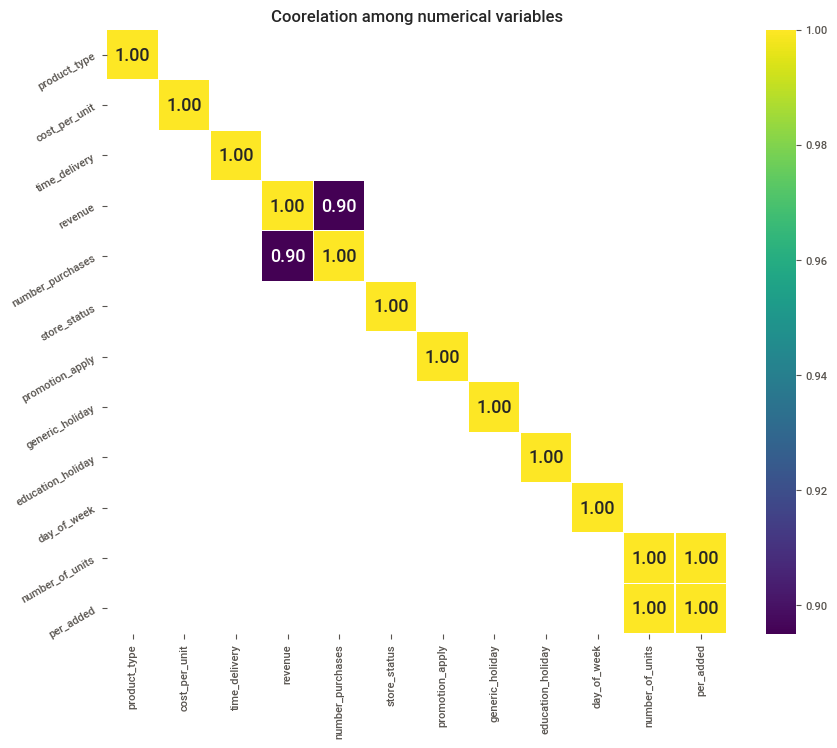

In [29]:
# feature to feature relationship
plt.figure(figsize=(10, 8))
plt.title('Coorelation among numerical variables')
ax = sns.heatmap(sample_data_corr[(sample_data_corr >= 0.8) | (sample_data_corr <= -0.8)], fmt = '.2f', cmap='viridis', annot = True,
                 linewidths = 0.2, annot_kws={"size": 13})
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 30)
plt.show()

- Extremely high +ve coorelation __(1.00)__ Number_of_units with 10%ofit
- Very high +voorlation __(0.89)__ Number_of_purchases with recnue

In [ ]:
# remove: number_of_units + number_purchases
sample_data.drop(['number_of_units', 'number_purchases'], axis=1, inplace=True)
sample_data

,product_type,cost_per_unit,time_delivery,revenue,store_status,promotion_apply,generic_holiday,education_holiday,day_of_week,per_added
198605,220,1015,7,2581,1,0,0,1,3,2.80
740377,813,1098,9,6496,1,1,0,0,5,6.51
951230,1043,1815,14,9547,1,0,0,0,5,5.79
131639,146,185,9,9771,1,1,0,1,2,58.10
738834,811,834,13,0,0,0,0,0,7,0.00
...,...,...,...,...,...,...,...,...,...,...
509444,559,1010,14,1815,1,0,0,0,6,1.98
900536,988,961,11,0,0,0,0,0,7,0.00
675840,743,1474,7,6174,1,1,0,0,1,4.61
308141,339,1801,11,4941,1,0,0,0,3,3.02


In [ ]:
# export merged data
sample_data.to_csv('drive/MyDrive/ExcelR_Project/data_sample.csv')

In [30]:
from sklearn.utils import shuffle

sample_data = shuffle(sample_data)
sample_data.shape

(50860, 12)

In [31]:
X = sample_data.drop(['per_added'],axis=1).values
Y = sample_data.per_added.values

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((40688, 11), (10172, 11), (40688,), (10172,))

In [33]:
from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
X_train = rc.fit_transform(X_train)
X_test = rc.transform(X_test)

In [34]:
from sklearn.ensemble import RandomForestRegressor

regressor_RF = RandomForestRegressor(n_estimators = 20, random_state = 0)
#regressor.fit(X_train, Y_train.reshape((-1, 1)))
regressor_RF.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [35]:
y_pred_RF = regressor_RF.predict(X_test)
y_pred_RF

array([ 8.64000474, 16.29806414, 18.16294301, ...,  0.        ,
       26.44497599,  0.        ])

In [36]:
from sklearn import metrics

print('Mean Absolute Error     :', metrics.mean_absolute_error(Y_test, y_pred_RF))
print('Mean Squared Error      :', metrics.mean_squared_error(Y_test, y_pred_RF))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_RF)))

Mean Absolute Error     : 0.0049270606921810725
Mean Squared Error      : 0.0030151789859590153
Root Mean Squared Error : 0.054910645470245704


In [37]:
df_RF = pd.DataFrame({'Real Values' : Y_test, 'Predicted Values' : y_pred_RF})
df_RF

,Real Values,Predicted Values
0,8.639887,8.640005
1,16.294982,16.298064
2,18.164259,18.162943
3,0.000000,0.000000
4,5.953425,5.953777
...,...,...
10167,4.088975,4.088872
10168,3.301770,3.301279
10169,0.000000,0.000000
10170,26.433000,26.444976


In [38]:
from sklearn.tree import DecisionTreeRegressor

regressor_DT = DecisionTreeRegressor()
regressor_DT.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [39]:
y_pred_DT = regressor_DT.predict(X_test)
y_pred_DT

array([ 8.63998324, 16.29847209, 18.15859375, ...,  0.        ,
       26.45069124,  0.        ])

In [40]:
from sklearn import metrics

print('Mean Absolute Error     :', metrics.mean_absolute_error(Y_test, y_pred_DT))
print('Mean Squared Error      :', metrics.mean_squared_error(Y_test, y_pred_DT))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_DT)))

Mean Absolute Error     : 0.0072605133298782295
Mean Squared Error      : 0.0064061754455997134
Root Mean Squared Error : 0.08003858722890925


In [41]:
df_DT = pd.DataFrame({'Real Values' : Y_test, 'Predicted Values' : y_pred_DT})
df_DT

,Real Values,Predicted Values
0,8.639887,8.639983
1,16.294982,16.298472
2,18.164259,18.158594
3,0.000000,0.000000
4,5.953425,5.953832
...,...,...
10167,4.088975,4.088327
10168,3.301770,3.302846
10169,0.000000,0.000000
10170,26.433000,26.450691


In [42]:
from sklearn.linear_model import LinearRegression

regressor_LR = LinearRegression()
regressor_LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_pred_LR = regressor_LR.predict(X_test)

In [44]:
from sklearn import metrics

print('Mean Absolute Error     :', metrics.mean_absolute_error(Y_test, y_pred_LR))
print('Mean Squared Error      :', metrics.mean_squared_error(Y_test, y_pred_LR))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_LR)))

Mean Absolute Error     : 5.816685884208532e-13
Mean Squared Error      : 3.39196487873746e-25
Root Mean Squared Error : 5.824057759618684e-13


In [45]:
df_LR = pd.DataFrame({'Real Values' :Y_test, 'Predicted Values' : y_pred_LR})
df_LR

,Real Values,Predicted Values
0,8.639887,8.639887e+00
1,16.294982,1.629498e+01
2,18.164259,1.816426e+01
3,0.000000,-5.666578e-13
4,5.953425,5.953425e+00
...,...,...
10167,4.088975,4.088975e+00
10168,3.301770,3.301770e+00
10169,0.000000,-5.595524e-13
10170,26.433000,2.643300e+01


## H) Expt: On whole dataset

In [5]:
data.head()

NameError: ignored

In [47]:
data['number_of_units'] = data['revenue'] / data['cost_per_unit']
data.head()

,product_type,cost_per_unit,time_delivery,revenue,number_purchases,store_status,promotion_apply,generic_holiday,education_holiday,day_of_week,number_of_units
0,1,457,11,14190,890,1,1,0,1,5,31.050328
1,1,457,11,5020,546,1,1,0,1,4,10.984683
2,1,457,11,4782,523,1,1,0,1,3,10.463895
3,1,457,11,5011,560,1,1,0,1,2,10.964989
4,1,457,11,6102,612,1,1,0,1,1,13.352298


In [48]:
_ = data['number_of_units'] * 0.15 # 10% added
data['per_added'] = data['number_of_units'] + _
data.head()

,product_type,cost_per_unit,time_delivery,revenue,number_purchases,store_status,promotion_apply,generic_holiday,education_holiday,day_of_week,number_of_units,per_added
0,1,457,11,14190,890,1,1,0,1,5,31.050328,35.707877
1,1,457,11,5020,546,1,1,0,1,4,10.984683,12.632385
2,1,457,11,4782,523,1,1,0,1,3,10.463895,12.033479
3,1,457,11,5011,560,1,1,0,1,2,10.964989,12.609737
4,1,457,11,6102,612,1,1,0,1,1,13.352298,15.355142


In [49]:
# finding the correlation of numeric features
data_corr = data.corr()
data_corr

,product_type,cost_per_unit,time_delivery,revenue,number_purchases,store_status,promotion_apply,generic_holiday,education_holiday,day_of_week,number_of_units,per_added
product_type,1.000000,-0.042775,-0.018510,0.005119,0.024331,-0.000039,0.000058,0.000542,0.000641,-0.000008,0.016953,0.016953
cost_per_unit,-0.042775,1.000000,0.020338,0.003452,0.000673,-0.000234,0.000008,-0.000091,0.001415,-0.000001,-0.493899,-0.493899
time_delivery,-0.018510,0.020338,1.000000,-0.008501,0.003093,-0.001874,0.000016,-0.001021,-0.000055,-0.000002,-0.046928,-0.046928
revenue,0.005119,0.003452,-0.008501,1.000000,0.894702,0.678470,0.452346,-0.254215,0.085136,-0.462120,0.376045,0.376045
number_purchases,0.024331,0.000673,0.003093,0.894702,1.000000,0.616768,0.316165,-0.226607,0.071564,-0.386447,0.337227,0.337227
store_status,-0.000039,-0.000234,-0.001874,0.678470,0.616768,1.000000,0.295034,-0.378375,0.086166,-0.528963,0.260587,0.260587
promotion_apply,0.000058,0.000008,0.000016,0.452346,0.316165,0.295034,1.000000,-0.012353,0.067483,-0.392925,0.170359,0.170359
generic_holiday,0.000542,-0.000091,-0.001021,-0.254215,-0.226607,-0.378375,-0.012353,1.000000,0.148651,-0.052889,-0.097207,-0.097207
education_holiday,0.000641,0.001415,-0.000055,0.085136,0.071564,0.086166,0.067483,0.148651,1.000000,-0.205388,0.031085,0.031085
day_of_week,-0.000008,-0.000001,-0.000002,-0.462120,-0.386447,-0.528963,-0.392925,-0.052889,-0.205388,1.000000,-0.173928,-0.173928


In [50]:
# feature to feature relationship
plt.figure(figsize=(10, 8))
plt.title('Coorelation among numerical variables')
ax = sns.heatmap(data[(data >= 0.8) | (data <= -0.8)], fmt = '.2f', cmap='viridis', annot = True,
                 linewidths = 0.2, annot_kws={"size": 13})
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 30)
plt.show()

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb756345c20> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fb7562d1290> (for post_execute):


KeyboardInterrupt: ignored

In [51]:
# remove: number_of_units + number_purchases
data.drop(['number_of_units', 'number_purchases'], axis=1, inplace=True)
data

,product_type,cost_per_unit,time_delivery,revenue,store_status,promotion_apply,generic_holiday,education_holiday,day_of_week,per_added
0,1,457,11,14190,1,1,0,1,5,35.707877
1,1,457,11,5020,1,1,0,1,4,12.632385
2,1,457,11,4782,1,1,0,1,3,12.033479
3,1,457,11,5011,1,1,0,1,2,12.609737
4,1,457,11,6102,1,1,0,1,1,15.355142
...,...,...,...,...,...,...,...,...,...,...
1017204,1115,454,14,4771,1,0,0,1,6,12.085132
1017205,1115,454,14,4540,1,0,0,1,5,11.500000
1017206,1115,454,14,4297,1,0,0,1,4,10.884471
1017207,1115,454,14,3697,1,0,0,1,3,9.364648


In [52]:
from sklearn.utils import shuffle

data = shuffle(data)
data.shape

(1017209, 10)

In [53]:
X1 = data.drop(['per_added'],axis=1).values
Y1 = data.per_added.values

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.25, random_state=510)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((762906, 9), (254303, 9), (762906,), (254303,))

In [55]:
from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
X_train = rc.fit_transform(X_train)
X_test = rc.transform(X_test)

In [56]:
from sklearn.ensemble import RandomForestRegressor

regressor_RF = RandomForestRegressor(n_estimators = 25, random_state = 0)
#regressor.fit(X_train, Y_train.reshape((-1, 1)))
regressor_RF.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [57]:
y_pred_RF = regressor_RF.predict(X_test)
y_pred_RF

array([17.12329675,  9.1553441 , 43.45178296, ...,  3.4767166 ,
        5.74003645,  7.17362943])

In [58]:
from sklearn import metrics

print('Mean Absolute Error     :', metrics.mean_absolute_error(Y_test, y_pred_RF))
print('Mean Squared Error      :', metrics.mean_squared_error(Y_test, y_pred_RF))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_RF)))
'''
Mean Absolute Error     : 0.016352361281615043
Mean Squared Error      : 0.0385498775345059
Root Mean Squared Error : 0.19634122729194167
'''

Mean Absolute Error     : 0.015311705064019408
Mean Squared Error      : 0.017409700548944237
Root Mean Squared Error : 0.13194582429521684


'\nMean Absolute Error     : 0.016352361281615043\nMean Squared Error      : 0.0385498775345059\nRoot Mean Squared Error : 0.19634122729194167\n'

In [59]:
df_RF = pd.DataFrame({'Real Values' : Y_test, 'Predicted Values' : y_pred_RF})
df_RF

,Real Values,Predicted Values
0,17.137362,1.712330e+01
1,9.161606,9.155344e+00
2,43.470819,4.345178e+01
3,0.000000,2.189683e-07
4,0.000000,2.189683e-07
...,...,...
254298,33.206250,3.321049e+01
254299,9.287312,9.294722e+00
254300,3.478308,3.476717e+00
254301,5.744335,5.740036e+00


## I) Expt: md5

In [60]:
!pip install pycaret

     |████████████████████████████████| 266kB 8.0MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 14.2MB 227kB/s 
     |████████████████████████████████| 1.7MB 49.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8MB 56.2MB/s 
     |████████████████████████████████| 276kB 54.4MB/s 
     |████████████████████████████████| 2.0MB 47.8MB/s 
     |████████████████████████████████| 245kB 52.1MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 102kB 12.6MB/s 
     |████████████████████████████████| 215kB 55.2MB/s 
     |████████████████████████████████| 1.2MB 45.9MB/s 
     |████████████████████████████████| 1.1MB 54.3MB/s 
     |████████████████████████████████| 163kB 59.5MB/s 
     |████████████████████████████████| 378kB 54.6MB

In [2]:
from pycaret.regression import *

ModuleNotFoundError: ignored

In [1]:
exp_reg101 = setup(data = sample_data, target = 'per_added', session_id=105,
                   remove_outliers = True, outliers_threshold = 0.05, 
                   normalize = True, normalize_method = 'robust', 
                   transformation = True, html = False
                   ) 

NameError: ignored

In [ ]:
best_specific = compare_models(include = ['lr','lasso','ridge','knn','dt','rf','et', 'lightgbm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,8.3003,239.1907,15.4326,0.4062,0.9725,0.9041,0.295


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,8.3003,239.1907,15.4326,0.4062,0.9725,0.9041,0.295
lasso,Lasso Regression,7.7555,242.9678,15.5498,0.3974,0.9319,0.7670,0.031


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,8.3003,239.1907,15.4326,0.4062,0.9725,0.9041,0.295
ridge,Ridge Regression,8.3000,239.1901,15.4325,0.4062,0.9725,0.9040,0.029
lasso,Lasso Regression,7.7555,242.9678,15.5498,0.3974,0.9319,0.7670,0.031


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,3.0212,111.7102,10.5369,0.7233,0.2113,0.1661,0.637
lr,Linear Regression,8.3003,239.1907,15.4326,0.4062,0.9725,0.9041,0.295
ridge,Ridge Regression,8.3000,239.1901,15.4325,0.4062,0.9725,0.9040,0.029
lasso,Lasso Regression,7.7555,242.9678,15.5498,0.3974,0.9319,0.7670,0.031


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.2167,0.8555,0.9100,0.9979,0.0169,0.0121,0.194
knn,K Neighbors Regressor,3.0212,111.7102,10.5369,0.7233,0.2113,0.1661,0.637
lr,Linear Regression,8.3003,239.1907,15.4326,0.4062,0.9725,0.9041,0.295
ridge,Ridge Regression,8.3000,239.1901,15.4325,0.4062,0.9725,0.9040,0.029
lasso,Lasso Regression,7.7555,242.9678,15.5498,0.3974,0.9319,0.7670,0.031


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.1126,0.6100,0.7439,0.9985,0.0090,0.0049,11.401
dt,Decision Tree Regressor,0.2167,0.8555,0.9100,0.9979,0.0169,0.0121,0.194
knn,K Neighbors Regressor,3.0212,111.7102,10.5369,0.7233,0.2113,0.1661,0.637
lr,Linear Regression,8.3003,239.1907,15.4326,0.4062,0.9725,0.9041,0.295
ridge,Ridge Regression,8.3000,239.1901,15.4325,0.4062,0.9725,0.9040,0.029
lasso,Lasso Regression,7.7555,242.9678,15.5498,0.3974,0.9319,0.7670,0.031


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0696,0.2125,0.4319,0.9995,0.0064,0.0035,9.793
rf,Random Forest Regressor,0.1126,0.6100,0.7439,0.9985,0.0090,0.0049,11.401
dt,Decision Tree Regressor,0.2167,0.8555,0.9100,0.9979,0.0169,0.0121,0.194
knn,K Neighbors Regressor,3.0212,111.7102,10.5369,0.7233,0.2113,0.1661,0.637
lr,Linear Regression,8.3003,239.1907,15.4326,0.4062,0.9725,0.9041,0.295
ridge,Ridge Regression,8.3000,239.1901,15.4325,0.4062,0.9725,0.9040,0.029
lasso,Lasso Regression,7.7555,242.9678,15.5498,0.3974,0.9319,0.7670,0.031


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0696,0.2125,0.4319,0.9995,0.0064,0.0035,9.793
rf,Random Forest Regressor,0.1126,0.6100,0.7439,0.9985,0.0090,0.0049,11.401
dt,Decision Tree Regressor,0.2167,0.8555,0.9100,0.9979,0.0169,0.0121,0.194
lightgbm,Light Gradient Boosting Machine,0.2742,1.1676,1.0046,0.9971,0.0404,0.0232,0.290
knn,K Neighbors Regressor,3.0212,111.7102,10.5369,0.7233,0.2113,0.1661,0.637
lr,Linear Regression,8.3003,239.1907,15.4326,0.4062,0.9725,0.9041,0.295
ridge,Ridge Regression,8.3000,239.1901,15.4325,0.4062,0.9725,0.9040,0.029
lasso,Lasso Regression,7.7555,242.9678,15.5498,0.3974,0.9319,0.7670,0.031


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0696,0.2125,0.4319,0.9995,0.0064,0.0035,9.793
rf,Random Forest Regressor,0.1126,0.6100,0.7439,0.9985,0.0090,0.0049,11.401
dt,Decision Tree Regressor,0.2167,0.8555,0.9100,0.9979,0.0169,0.0121,0.194
lightgbm,Light Gradient Boosting Machine,0.2742,1.1676,1.0046,0.9971,0.0404,0.0232,0.290
knn,K Neighbors Regressor,3.0212,111.7102,10.5369,0.7233,0.2113,0.1661,0.637
lr,Linear Regression,8.3003,239.1907,15.4326,0.4062,0.9725,0.9041,0.295
ridge,Ridge Regression,8.3000,239.1901,15.4325,0.4062,0.9725,0.9040,0.029
lasso,Lasso Regression,7.7555,242.9678,15.5498,0.3974,0.9319,0.7670,0.031


In [ ]:
model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0980,0.2163,0.4651,0.9995,0.0070,0.0048
1,0.0999,0.2396,0.4895,0.9993,0.0086,0.0048
2,0.1199,0.4220,0.6496,0.9990,0.0083,0.0048
3,0.1137,1.2625,1.1236,0.9964,0.0084,0.0048
4,0.1156,0.4793,0.6923,0.9989,0.0101,0.0052
5,0.1130,0.4949,0.7035,0.9989,0.0103,0.0050
6,0.1134,0.8451,0.9193,0.9977,0.0090,0.0048
7,0.1094,0.3723,0.6102,0.9990,0.0082,0.0049
8,0.1349,1.4092,1.1871,0.9970,0.0088,0.0050
9,0.1077,0.3590,0.5992,0.9989,0.0112,0.0049


In [ ]:
#tuned_model = tune_model(model)
tuned_model_rf = tune_model(model)

In [ ]:
predictions = predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.1133,0.9201,0.9592,0.9978,0.0179,0.0049


In [ ]:
print(tuned_model)

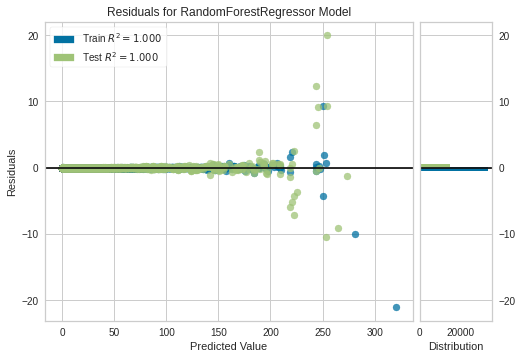

In [ ]:
plot_model(model)

In [ ]:
predictions = predict_model(model)

In [ ]:
plot_model(model, plot = 'error')

In [ ]:
plot_model(model, plot='feature')

In [ ]:
evaluate_model(model)

In [ ]:
finalize_model(tuned_model)

## K) Work